# Construção da base a partir do JSON

________
_______
_______

In [7]:
import numpy as np
import pandas as pd
import json
import re

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = "{:.2f}".format

import locale

locale.setlocale(locale.LC_ALL, '')

In [8]:
# função de processamento de texto

from unicodedata import normalize

def tira_acento(x):
    
    return normalize('NFKD', x).encode('ASCII','ignore').decode('ASCII')

In [9]:
# função de exibição 

def show_all(df):
    
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_columns', None)
    
    display(df)
    
    pd.reset_option('display.max_colwidth')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.max_columns')
    

______

### 1) Leitura dos dados

In [10]:
from os import listdir
from os.path import isfile, join
import time

path = "../data/"

print("\nLista de arquivos disponíveis para a leitura:\n")

file_list = [str(i) + " - " + f for i, f in enumerate(listdir(path)) if isfile(join(path, f))]

print(*file_list, sep="\n")

time.sleep(0.5)

num = int(input("\nDigite o número correspondente ao arquivo desejado: (0-" + str(len(file_list)) + "): "))

file_path = path + file_list[num].split(" - ")[-1]

file_path


Lista de arquivos disponíveis para a leitura:

0 - README.md
1 - car_info.json
2 - WEBMOTORS-01-04-2021-20h07.json
3 - WEBMOTORS-01-04-2021-19h54.json
4 - data_root.json

Digite o número correspondente ao arquivo desejado: (0-5): 3


'../data/WEBMOTORS-01-04-2021-19h54.json'

In [11]:
# lê o arquivo e cria lista com json de cada carro

with open(file_path) as f:
    
    json_list = json.load(f)

In [12]:
# identificando quais chaves têm listas como valores
# nestes casos, o json_normaliza falha, por isso é importante identificarmos
# antes pra fazer o flatenning

list_values = []
for item in json_list:
    
    for key in item.keys():

        if type(item[key]) == list:

            # print(key, item[key])
            
            if key not in list_values:
                
                list_values.append(key)
                
if len(list_values) > 0:
    
    print("\nHá jsons com chaves cujos valores são listas!!")
    print("Estas chaves são:")
    print(list_values)
          
    print("\nVamos corrigir isso agora!")
    
    # fazendo o flattening dos valores que são listas

    for item in json_list:

        for key in list_values:

            try:
                for i in range(len(item[key])):

                    item[key + "_" + str(i+1)] = item[key][i]

                item.pop(key)

            except:

                pass
    
    print("\nTudo corrigido! Podemos seguir com a construção do df!")
    
# se não tiver nenhuma chave com essa característíca, ótimo!
else:
    
    print("\nNão há problemas com json algum, tudo certo!")
    print("\nPodemos seguir diretamente com a construlção do df!")


Não há problemas com json algum, tudo certo!

Podemos seguir diretamente com a construlção do df!


In [13]:
# montando o df

df = pd.json_normalize(json_list)

del json_list, list_values

In [14]:
df.shape

(265872, 38)

In [15]:
df.columns.tolist()

['LongComment',
 'FipePercent',
 'unico_dono',
 'ipva_pago',
 'aceita_troca',
 'financiado',
 'licenciado',
 'garantia_fabrica',
 'colecionador',
 'revisoes_concessionaria',
 'revisoes_agenda_carro',
 'contains_leilao',
 'Specification.Title',
 'Specification.Make.Value',
 'Specification.Model.Value',
 'Specification.Version.Value',
 'Specification.YearFabrication',
 'Specification.YearModel',
 'Specification.Odometer',
 'Specification.Transmission',
 'Specification.NumberPorts',
 'Specification.BodyType',
 'Specification.Armored',
 'Specification.Color.Primary',
 'Seller.SellerType',
 'Seller.City',
 'Seller.State',
 'Seller.DealerScore',
 'Seller.CarDelivery',
 'Seller.TrocaComTroco',
 'Seller.ExceededPlan',
 'Prices.Price',
 'Prices.SearchPrice',
 'GoodDeal',
 'pessoas_deficiencia',
 'alienado',
 'VipAutopago',
 'Prices.OldPrice']

In [16]:
show_all(df.head(3))

LongComment  \
0  Carro em ótimo estado!!! Versão é a mais completa!!! Sistema de entretenimento, rodas esportivas 20, abertura elétrica do porta-malas, aquecimento dos bancos, Câmeras 360º, Sistema de som Meridian com 17 alto-falantes!!! Única dona, pneus novos, todas as revisões em Concessionária!!!   
1                                                                                                                             Dispensa comentários - preço para vender rápido - inteira, 367 cavalos- recibo em branco\n\nAceito contra oferta! Whatsapp 11 99255-2035\n\nCarro de colecionador   
2                                                                                                                                                                                     Veiculo Blindado !!! Carro Para Pessoas Exigentes! (Não Aceito Troca)\nÚnico dono\nCARRO MUITO CONSERVADO   

   FipePercent unico_dono ipva_pago aceita_troca financiado licenciado  \
0       113.00       True      True        False      False       True   
1        73.00       True      True         True      False       True   
2        99.00       True      True        False      False       True   

  garantia_fabrica colecionador revisoes_concessionaria revisoes_agenda_carro  \
0            False        False                    True                  True   
1            False        False                    True                  True   
2            False        False                    True                  True   

  contains_leilao  \
0           False   
1           False   
2           False   

                                                                Specification.Title  \
0  LAND ROVER RANGE ROVER EVOQUE 2.2 SDA PRESTIGE TECH 4X4 16V DIESEL 4P AUTOMÁTICO   
1                                  BMW 550i 4.8 SEDAN V8 32V GASOLINA 4P AUTOMÁTICO   
2        LAND ROVER RANGE ROVER SPORT 3.0 HSE 4X4 V6 24V TURBO DIESEL 4P AUTOMÁTICO   

  Specification.Make.Value Specification.Model.Value  \
0               LAND ROVER        RANGE ROVER EVOQUE   
1                      BMW                      550i   
2               LAND ROVER         RANGE ROVER SPORT   

                          Specification.Version.Value  \
0  2.2 SDA PRESTIGE TECH 4X4 16V DIESEL 4P AUTOMÁTICO   
1             4.8 SEDAN V8 32V GASOLINA 4P AUTOMÁTICO   
2       3.0 HSE 4X4 V6 24V TURBO DIESEL 4P AUTOMÁTICO   

  Specification.YearFabrication  Specification.YearModel  \
0                          2014                  2015.00   
1                          2006                  2007.00   
2                          2013                  2013.00   

   Specification.Odometer Specification.Transmission  \
0                56000.00                 Automática   
1               139000.00                 Automática   
2                81048.00                 Automática   

  Specification.NumberPorts Specification.BodyType Specification.Armored  \
0                         4   Utilitário esportivo                     N   
1                         4                   Sedã                     S   
2                         4   Utilitário esportivo                     S   

  Specification.Color.Primary Seller.SellerType   Seller.City  \
0                       Preto                PF  Campo Grande   
1                       Preto                PF     São Paulo   
2                       Preto                PF     São Paulo   

              Seller.State  Seller.DealerScore  Seller.CarDelivery  \
0  Mato Grosso do Sul (MS)                   0               False   
1           São Paulo (SP)                   0               False   
2           São Paulo (SP)                   0               False   

   Seller.TrocaComTroco  Seller.ExceededPlan  Prices.Price  \
0                 False                False     165000.00   
1                 False                False      48000.00   
2                 False                False     140000.00   

   Prices.SearchPrice GoodDeal pessoas_

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265872 entries, 0 to 265871
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   LongComment                    239074 non-null  object 
 1   FipePercent                    251483 non-null  float64
 2   unico_dono                     263728 non-null  object 
 3   ipva_pago                      263201 non-null  object 
 4   aceita_troca                   260265 non-null  object 
 5   financiado                     112558 non-null  object 
 6   licenciado                     112558 non-null  object 
 7   garantia_fabrica               55715 non-null   object 
 8   colecionador                   41615 non-null   object 
 9   revisoes_concessionaria        41615 non-null   object 
 10  revisoes_agenda_carro          19210 non-null   object 
 11  contains_leilao                239073 non-null  object 
 12  Specification.Title           

In [18]:
print("\nColunas com dados missing em respectiva proporção:")

# colunas com dados missing, apenas
# contagem já normalizada
missing = df.isnull().sum()[df.isnull().sum().apply(lambda x: True if x!=0 else False)]/df.shape[0]

# print formatado
missing.apply(lambda x: "{:.2f}%".format(x*100))


Colunas com dados missing em respectiva proporção:


LongComment                10.08%
FipePercent                 5.41%
unico_dono                  0.81%
ipva_pago                   1.00%
aceita_troca                2.11%
financiado                 57.66%
licenciado                 57.66%
garantia_fabrica           79.04%
colecionador               84.35%
revisoes_concessionaria    84.35%
revisoes_agenda_carro      92.77%
contains_leilao            10.08%
Specification.BodyType      0.01%
Seller.City                 0.00%
GoodDeal                   95.19%
pessoas_deficiencia        99.18%
alienado                   99.18%
VipAutopago                99.97%
Prices.OldPrice            98.04%
dtype: object

_______

### 2) Pré-processamento

In [19]:
# caso queira evitar que alguma coluna seja dropada

keep = []

In [20]:
# vamos dropar as colunas que tenham mais que 50% de NaNs

threshold_drop = 0.5

print("\nColunas com proporção de NaNs maior que o threshold de {:.0f}%:\n".format(threshold_drop*100))

display(missing[missing>threshold_drop].apply(lambda x: "{:.2f}%".format(x*100)))

drop_nans = missing[missing>threshold_drop].index.tolist()

# evitando que colunas em "keep" sejam dropadas
drop_nans = [x for x in drop_nans if x not in keep]

# dropando!
df = df.drop(columns=drop_nans)

print("\nColunas acima dropadas com sucesso!")


Colunas com proporção de NaNs maior que o threshold de 50%:



financiado                 57.66%
licenciado                 57.66%
garantia_fabrica           79.04%
colecionador               84.35%
revisoes_concessionaria    84.35%
revisoes_agenda_carro      92.77%
GoodDeal                   95.19%
pessoas_deficiencia        99.18%
alienado                   99.18%
VipAutopago                99.97%
Prices.OldPrice            98.04%
dtype: object


Colunas acima dropadas com sucesso!


In [21]:
# for item in df.columns.tolist():
    
#     print(f'"{item}" : "{item}",')

In [23]:
# renomeando colunas

rename_dic = {  "LongComment" : "comentario",
                "FipePercent" : "fipe_perc",
                "unico_dono" : "unico_dono",
                "ipva_pago" : "ipva_pago",
                "aceita_troca" : "aceita_troca",
                "financiado" : "financiado",
                "licenciado" : "licenciado",
                "contains_leilao" : "contains_leilao",
                "Specification.Title" : "titulo",
                "Specification.Make.Value" : "marca",
                "Specification.Model.Value" : "modelo",
                "Specification.Version.Value" : "versao",
                "Specification.YearFabrication" : "ano",
                "Specification.YearModel" : "ano_modelo",
                "Specification.Odometer" : "km",
                "Specification.Transmission" : "transmissao",
                "Specification.NumberPorts" : "num_portas",
                "Specification.BodyType" : "categoria",
                "Specification.Armored" : "blindado",
                "Specification.Color.Primary" : "cor",
                "Seller.SellerType" : "vendedor_tipo",
                "Seller.City" : "vendedor_cidade",
                "Seller.State" : "vendedor_estado",
                "Seller.DealerScore" : "score_vendedor",
                "Seller.CarDelivery" : "car_delivery",
                "Seller.TrocaComTroco" : "troca_troco",
                "Seller.ExceededPlan" : "exceeded_plan",
                "Prices.Price" : "preco",
                "Prices.SearchPrice" : "preco_busca"}

df = df.rename(columns=rename_dic)

# determinando a ordem 
# tá comentado, achei desnecessário

# cols_select = [ # atributos gerais
#                'titulo', 'marca', 'modelo', 'versao', 
#                'ano', 'ano_modelo', 
#                'km', 'transmissao', 'num_portas',
#                'categoria', 'blindado', 'cor',
#                 # preço
#                'preco', 'preco_busca', 'fipe_perc', 
#                 # flags binarias
#                'unico_dono', 'ipva_pago', 'aceita_troca', 'financiado', 'licenciado', 'contains_leilao',
#                 # info vendedor
#                'vendedor_tipo', 'vendedor_cidade', 'vendedor_estado', 'score_vendedor',
#                 # extras
#                'car_delivery', 'troca_troco', 'comentario',
#                 # 'exceeded_plan'
#                 ]

# df = df[cols_select]

In [24]:
show_all(df.head(3))

comentario  \
0  Carro em ótimo estado!!! Versão é a mais completa!!! Sistema de entretenimento, rodas esportivas 20, abertura elétrica do porta-malas, aquecimento dos bancos, Câmeras 360º, Sistema de som Meridian com 17 alto-falantes!!! Única dona, pneus novos, todas as revisões em Concessionária!!!   
1                                                                                                                             Dispensa comentários - preço para vender rápido - inteira, 367 cavalos- recibo em branco\n\nAceito contra oferta! Whatsapp 11 99255-2035\n\nCarro de colecionador   
2                                                                                                                                                                                     Veiculo Blindado !!! Carro Para Pessoas Exigentes! (Não Aceito Troca)\nÚnico dono\nCARRO MUITO CONSERVADO   

   fipe_perc unico_dono ipva_pago aceita_troca contains_leilao  \
0     113.00       True      True        False           False   
1      73.00       True      True         True           False   
2      99.00       True      True        False           False   

                                                                             titulo  \
0  LAND ROVER RANGE ROVER EVOQUE 2.2 SDA PRESTIGE TECH 4X4 16V DIESEL 4P AUTOMÁTICO   
1                                  BMW 550i 4.8 SEDAN V8 32V GASOLINA 4P AUTOMÁTICO   
2        LAND ROVER RANGE ROVER SPORT 3.0 HSE 4X4 V6 24V TURBO DIESEL 4P AUTOMÁTICO   

        marca              modelo  \
0  LAND ROVER  RANGE ROVER EVOQUE   
1         BMW                550i   
2  LAND ROVER   RANGE ROVER SPORT   

                                               versao   ano  ano_modelo  \
0  2.2 SDA PRESTIGE TECH 4X4 16V DIESEL 4P AUTOMÁTICO  2014     2015.00   
1             4.8 SEDAN V8 32V GASOLINA 4P AUTOMÁTICO  2006     2007.00   
2       3.0 HSE 4X4 V6 24V TURBO DIESEL 4P AUTOMÁTICO  2013     2013.00   

         km transmissao num_portas             categoria blindado    cor  \
0  56000.00  Automática          4  Utilitário esportivo        N  Preto   
1 139000.00  Automática          4                  Sedã        S  Preto   
2  81048.00  Automática          4  Utilitário esportivo        S  Preto   

  vendedor_tipo vendedor_cidade          vendedor_estado  score_vendedor  \
0            PF    Campo Grande  Mato Grosso do Sul (MS)               0   
1            PF       São Paulo           São Paulo (SP)               0   
2            PF       São Paulo           São Paulo (SP)               0   

   car_delivery  troca_troco  exceeded_plan     preco  preco_busca  
0         False        False          False 165000.00    165000.00  
1         False        False          False  48000.00     48000.00  
2         False        False          False 140000.00    140000.00

In [25]:
# isso vai auxiliar na correção dos dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265872 entries, 0 to 265871
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   comentario       239074 non-null  object 
 1   fipe_perc        251483 non-null  float64
 2   unico_dono       263728 non-null  object 
 3   ipva_pago        263201 non-null  object 
 4   aceita_troca     260265 non-null  object 
 5   contains_leilao  239073 non-null  object 
 6   titulo           265872 non-null  object 
 7   marca            265872 non-null  object 
 8   modelo           265872 non-null  object 
 9   versao           265872 non-null  object 
 10  ano              265872 non-null  object 
 11  ano_modelo       265872 non-null  float64
 12  km               265872 non-null  float64
 13  transmissao      265872 non-null  object 
 14  num_portas       265872 non-null  object 
 15  categoria        265856 non-null  object 
 16  blindado         265872 non-null  obje

In [26]:
# ajustando dtypes

df["ano"] = df["ano"].astype(int)

df["ano_modelo"] = df["ano_modelo"].astype(int)

df["num_portas"] = df["num_portas"].astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265872 entries, 0 to 265871
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   comentario       239074 non-null  object 
 1   fipe_perc        251483 non-null  float64
 2   unico_dono       263728 non-null  object 
 3   ipva_pago        263201 non-null  object 
 4   aceita_troca     260265 non-null  object 
 5   contains_leilao  239073 non-null  object 
 6   titulo           265872 non-null  object 
 7   marca            265872 non-null  object 
 8   modelo           265872 non-null  object 
 9   versao           265872 non-null  object 
 10  ano              265872 non-null  int64  
 11  ano_modelo       265872 non-null  int64  
 12  km               265872 non-null  float64
 13  transmissao      265872 non-null  object 
 14  num_portas       265872 non-null  int64  
 15  categoria        265856 non-null  object 
 16  blindado         265872 non-null  obje

In [28]:
# avaliando ststs descritivas procurando outliers absurdos

df.describe()

fipe_perc       ano  ano_modelo            km  num_portas  \
count  251483.00 265872.00   265872.00     265872.00   265872.00   
mean      269.72   2014.42     2015.01     182327.55        3.76   
std     19512.11      6.01        6.07   11093239.60        0.75   
min        61.00   1927.00     1927.00          0.00        0.00   
25%       104.00   2012.00     2013.00      30200.00        4.00   
50%       109.00   2015.00     2016.00      63630.50        4.00   
75%       115.00   2019.00     2019.00     103000.00        4.00   
max   4306466.00   2022.00     2022.00 2147483647.00        4.00   

       score_vendedor         preco   preco_busca  
count       265872.00     265872.00     265872.00  
mean             1.64     176268.88     176268.88  
std              1.57    9411295.02    9411295.02  
min              0.00          0.00          0.00  
25%              0.00      35950.00      35950.00  
50%              2.00      52900.00      52900.00  
75%              3.00      86900.00      86900.00  
max              4.00 1111111168.00 1111111168.00

In [61]:
aux = df[df["preco"] > 1e8][["marca", "modelo", "ano", "preco"]]

aux["preco"] = aux["preco"].apply(lambda x: locale.currency(x, grouping=True))

display(aux)

del aux

marca             modelo   ano                preco
15047             BMW                 M5  2020    R$ 690.000.000,00
25837      LAND ROVER  RANGE ROVER SPORT  2013    R$ 215.900.000,00
28558   MERCEDES-BENZ             ML 350  2015    R$ 169.900.000,00
30803      LAND ROVER        DISCOVERY 4  2014    R$ 159.000.000,00
31808         PORSCHE                911  2020    R$ 795.000.000,00
40811           VOLVO               XC40  2020    R$ 263.700.000,00
46658         PORSCHE              MACAN  2015    R$ 400.000.000,00
68790      VOLKSWAGEN             AMAROK  2018    R$ 112.900.000,00
95165            FORD             FUSION  2011  R$ 1.111.111.168,00
97032            JEEP           RENEGADE  2019  R$ 1.111.111.168,00
105638      CHEVROLET              ASTRA  2011    R$ 111.111.112,00
114369           JEEP     GRAND CHEROKEE  2012    R$ 111.111.112,00
118173     VOLKSWAGEN                GOL  2013  R$ 1.111.111.168,00
118581         NISSAN           FRONTIER  2021  R$ 1.000.000.000,00
125744         NISSAN           FRONTIER  2020  R$ 1.000.000.000,00
129422     VOLKSWAGEN            SAVEIRO  2011  R$ 1.111.111.168,00
133047        RENAULT            SANDERO  2012  R$ 1.111.111.168,00
138263     VOLKSWAGEN               POLO  2020  R$ 1.111.111.168,00
143460           JEEP           RENEGADE  2015  R$ 1.111.111.168,00
145109     VOLKSWAGEN              JETTA  2020  R$ 1.000.000.000,00
147808     VOLKSWAGEN                FOX  2015  R$ 1.111.111.168,00
152661           FORD              FOCUS  2018  R$ 1.111.111.168,00
162498     VOLKSWAGEN            T-CROSS  2020  R$ 1.111.111.168,00
163641         NISSAN           FRONTIER  2020  R$ 1.000.000.000,00
165102         NISSAN           FRONTIER  2021  R$ 1.000.000.000,00
168024         NISSAN              KICKS  2021  R$ 1.000.000.000,00
178815         NISSAN           FRONTIER  2020  R$ 1.000.000.000,00
215908           FIAT               TORO  2019    R$ 105.900.000,00
219867         TOYOTA          HILUX SW4  2018    R$ 255.000.000,00
220141         TOYOTA            COROLLA  2018    R$ 119.900.000,00
220381         TOYOTA          HILUX SW4  2014    R$ 130.000.000,00
220820           JEEP            COMPASS  2019  R$ 1.111.111.168,00
235609          VOLVO               XC60  2018    R$ 215.000.000,00
242422      CHEVROLET                S10  2008  R$ 1.111.111.168,00

In [55]:
# colunas preco e preco_busca são identicas?

(df["preco"] != df["preco_busca"]).sum()

0

_______

### 3) Feature engineering

In [29]:
# pegando cilindradas (1.0, 1.6, etc) a partir da coluna "versão" (proxy)

# obs: "Todo carro é movido por um motor à combustão, a diferença de um motor 
# para o outro é quantidade de cilindradas. 
# Quando falamos que um carro é 2.0, isso quer dizer que ele tem 2000 cilindradas. 
# O mesmo acontece com o 1.0 (1000 cc), 1.4 (1400), 1.6 (1.600) e 1.8 (1800)." 

df["cilindrada"] = df["versao"].apply(lambda x: 
                                       re.findall("\d+\.\d+", x)).apply(lambda x: 
                                                                        x[0] if len(x) == 1 else np.nan)

###############################################################

df["cilindrada"].value_counts(dropna=False)

1.0      60264
1.6      51955
2.0      48895
1.4      27188
1.8      25272
         ...  
8.4          1
40.12        1
8.3          1
0.7          1
7.5          1
Name: cilindrada, Length: 71, dtype: int64

In [30]:
# pegando o tipo de combustível do carro a partir da coluna "versão" (proxy)

def tipo_combustivel(x):

    ans = "OUTRO"
    
    for s in ["GASOLINA", "ALCOOL","DIESEL", "FLEX", "HIBRIDO", "HYBRID"]: 

        if s in tira_acento(x).upper(): 

            ans = s
    
    return ans
        
df["combustivel"] = df["versao"].apply(tipo_combustivel)

###############################################################

df["combustivel"].value_counts()

FLEX        191051
GASOLINA     48616
DIESEL       20723
OUTRO         3195
HYBRID        1001
ALCOOL         755
HIBRIDO        531
Name: combustivel, dtype: int64

_______

### 4) Análise preliminar - marcas e modelos

In [31]:
# dic de dfs pra cada marca
# estrutura: {"marca" : df_com_marca_filtrada}

marcas = df["marca"].unique().tolist()

df_marcas = {marca: df[df["marca"] == marca] for marca in marcas}

In [32]:
# dic com a seguinte estrutura: {"marca": {"modelo_i" : df_modelo_i.describe()}}

# essa célula pode demorar um pouquinho...

modelos_describe = {marca : 
                           {modelo: df_marcas[marca].loc[df_marcas[marca]["modelo"] == modelo].describe() 
                            for modelo in df_marcas[marca]["modelo"].unique().tolist()}
                    for marca in marcas}

In [33]:
print("\nMarcas disponíveis:\n")

print(list(modelos_describe.keys()))


Marcas disponíveis:

['LAND ROVER', 'BMW', 'MERCEDES-BENZ', 'CITROËN', 'JEEP', 'JAGUAR', 'VOLKSWAGEN', 'PORSCHE', 'FIAT', 'CHEVROLET', 'KIA', 'RENAULT', 'FORD', 'MINI', 'PEUGEOT', 'VOLVO', 'CHRYSLER', 'HYUNDAI', 'SSANGYONG', 'HONDA', 'HAFEI', 'AUDI', 'LEXUS', 'MITSUBISHI', 'TOYOTA', 'NISSAN', 'LIFAN', 'SUZUKI', 'TROLLER', 'CHERY', 'ALFA ROMEO', 'DODGE', 'SUBARU', 'JAC', 'MCLAREN', 'LAMBORGHINI', 'IVECO', 'CADILLAC', 'MASERATI', 'FERRARI', 'SMART', 'JINBEI', 'HUMMER', 'PLYMOUTH', 'INFINITI', 'WILLYS', 'LINCOLN', 'MAZDA', 'AGRALE', 'TESLA', 'GURGEL', 'PONTIAC', 'BENTLEY', 'PUMA', 'SHINERAY', 'ROLLS-ROYCE', 'MG', 'ASTON MARTIN', 'DKW-VEMAG', 'MP LAFER', 'MARCOPOLO', 'BUICK', 'FERCAR BUGGY', 'SANTA MATILDE', 'MIURA', 'ENVEMO', 'MERCURY', 'SHELBY', 'WILLYS OVERLAND', 'BRM', 'WAY BRASIL', 'BUGRE', 'LADA', 'SAAB', 'WALK', 'RDK', 'FOTON', 'EFFA', 'BAJA', 'GMC', 'MAHINDRA', 'RELY', 'DAIHATSU', 'DACON', 'SATURN', 'GEELY', 'AMERICAR', 'LOTUS', 'EMIS', 'ASIA', 'BUGWAY', 'CBT', 'OLDSMOBILE', 'STUD

In [34]:
# pegando modelos de determinada marca 

print(list(modelos_describe["HYUNDAI"].keys()))

['EQUUS', 'VELOSTER', 'SANTA FÉ', 'AZERA', 'HB20S', 'TUCSON', 'CRETA', 'HR', 'HB20', 'IX35', 'ELANTRA', 'VERACRUZ', 'GENESIS', 'I30', 'HB20X', 'GRAND SANTA FÉ', 'SONATA', 'H100', 'I30 CW', 'GALLOPER', 'H1 STAREX', 'TERRACAN', 'ACCENT', 'ATOS', 'COUPÊ', 'TIBURON']


In [35]:
# pegando stats de determinado modelo

modelos_describe["HYUNDAI"]['HB20']

fipe_perc     ano  ano_modelo          km  num_portas  score_vendedor  \
count    5279.00 5313.00     5313.00     5313.00     5313.00         5313.00   
mean      110.70 2016.93     2017.38    55118.30        3.94            1.72   
std         8.11    2.63        2.60   166072.44        0.44            1.55   
min        68.00 2012.00     2013.00        0.00        0.00            0.00   
25%       106.00 2015.00     2015.00    14130.00        4.00            0.00   
50%       111.00 2017.00     2018.00    48927.00        4.00            2.00   
75%       115.00 2019.00     2019.00    77000.00        4.00            3.00   
max       264.00 2022.00     2022.00 11111111.00        4.00            4.00   

          preco  preco_busca  
count   5313.00      5313.00  
mean   48956.95     48956.95  
std    10825.29     10825.29  
min    24000.00     24000.00  
25%    40990.00     40990.00  
50%    46900.00     46900.00  
75%    54800.00     54800.00  
max   131200.00    131200.00

In [36]:
# groupby - {marca: {modelo_i :  groupby_i(ano, cilindrada, combustivel)}}
# esse tbm demora um pouco

marca_modelo_ano = {marca : 
                        {modelo: 
                                 df_marcas[marca][df_marcas[marca]["modelo"] == modelo].groupby(["ano",
                                                                                                "cilindrada",
                                                                                                "combustivel"])[["km",
                                                                                                                 "preco",
                                                                                                                 "fipe_perc"]].agg(["count", 
                                                                                                                                    "mean",
                                                                                                                                    "min",
                                                                                                                                    "max",
                                                                                                                                    np.median]) 
                        for modelo in df_marcas[marca]["modelo"].unique().tolist()}
                    for marca in marcas}

In [37]:
marca_modelo_ano["HYUNDAI"]['HB20']

km                                          \
                            count      mean     min         max    median   
ano  cilindrada combustivel                                                 
2012 1.0        FLEX           49  84360.59  101.00   147258.00  92000.00   
     1.6        FLEX           82 103161.98 1010.00   195000.00 102440.00   
2013 1.0        FLEX          254 101251.91  100.00  1111111.00  87498.00   
     1.6        FLEX          270  92072.40  100.00   999999.00  88217.50   
2014 1.0        FLEX          309  93148.47  100.00   999999.00  80000.00   
     1.6        FLEX          253  83234.64  100.00   999999.00  74000.00   
2015 1.0        FLEX          346  79502.73  100.00   999999.00  75000.00   
     1.6        FLEX          233  70804.68  100.00   999999.00  66663.00   
2016 1.0        FLEX          371  74532.54  100.00   999999.00  69148.00   
     1.6        FLEX          219  61903.40  100.00   145000.00  60000.00   
2017 1.0        FLEX          427  53478.59    0.00   152000.00  51000.00   
     1.6        FLEX          151  53078.72    0.00   127000.00  50000.00   
2018 1.0        FLEX          420  72287.59    0.00 11111111.00  42000.00   
     1.6        FLEX          159  43298.23  101.00   999999.00  36263.00   
2019 1.0        FLEX          609  37340.27    0.00   800000.00  40000.00   
     1.6        FLEX           76  24950.22    0.00    64000.00  22773.50   
2020 1.0        FLEX          453   3859.85    0.00   666666.00      0.00   
     1.6        FLEX           42   1641.38    0.00    14219.00      0.00   
2021 1.0        FLEX          522    123.48    0.00    36000.00      0.00   
     1.6        FLEX           67     62.33    0.00     4075.00      0.00   
2022 1.0        FLEX            1      0.00    0.00        0.00      0.00   

                            preco                                       \
                            count     mean      min       max   median   
ano  cilindrada combustivel                                              
2012 1.0        FLEX           49 35174.27 24000.00  39900.00 35000.00   
     1.6        FLEX           82 37126.71 30900.00  44890.00 36900.00   
2013 1.0        FLEX          254 36587.89 26000.00  43900.00 36645.00   
     1.6        FLEX          270 39445.09 30000.00  50000.00 39000.00   
2014 1.0        FLEX          309 38446.93 29999.00  48900.00 38000.00   
     1.6        FLEX          253 43660.66 31900.00  62900.00 43900.00   
2015 1.0        FLEX          346 39843.68 29000.00  50000.00 39900.00   
     1.6        FLEX          233 46114.84 32000.00  99999.99 45900.00   
2016 1.0        FLEX          371 42602.84 30000.00  52990.00 42900.00   
     1.6        FLEX          219 50070.99 37900.00  74900.00 49900.00   
2017 1.0        FLEX          427 44943.09 35000.00  52990.00 44900.00   
     1.6        FLEX          151 55552.31 35900.00  70000.00 55900.00   
2018 1.0        FLEX          420 47719.78 34900.00  59900.00 47900.00   
     1.6        FLEX          159 58682.64 40900.00  71900.00 58900.00   
2019 1.0        FLEX          609 50732.96 35000.00  82490.00 49880.00   
     1.6        FLEX           76 62369.68 49870.00 109800.00 61845.00   
2020 1.0        FLEX          453 60875.26 32597.00  84990.00 57990.00   
     1.6        FLEX           42 72435.50 60990.00 119999.00 71900.00   
2021 1.0        FLEX          522 63361.97 50900.00 131200.00 59900.00   
     1.6        FLEX           67 72040.15 56900.00  79990.00 71990.00   
2022 1.0        FLEX            1 59900.00 59900.00  59900.00 59900.00   

                            fipe_perc                              
                                count   mean    min    max median  
ano  cilindrada combustivel                                        
2012 1.0        FLEX               49 109.65  75.00 124.00 109.00  
     1.6        FLEX               82 106.85  90.00 128.00 107.00  
2013 1.0        FLEX              254 108.25  79.00 132.00 109.00

______

__Vamos pegar as N marcas mais comuns (em termos de count de carros)__

Destas, vamos rodar o DBSCAN pra cada modelo. Com isso, encontraremos outliers.

In [38]:
# top N

N = 10

topN = df["marca"].value_counts().iloc[:N].index

topN

Index(['VOLKSWAGEN', 'CHEVROLET', 'FORD', 'FIAT', 'RENAULT', 'HYUNDAI',
       'TOYOTA', 'HONDA', 'JEEP', 'PEUGEOT'],
      dtype='object')


#############################################################
#############################################################
~~~~~~	Marca: VOLKSWAGEN
#############################################################
#############################################################


MODELO: PARATI


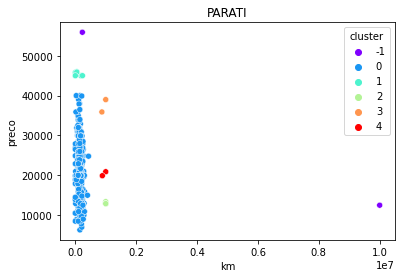


MODELO: KOMBI


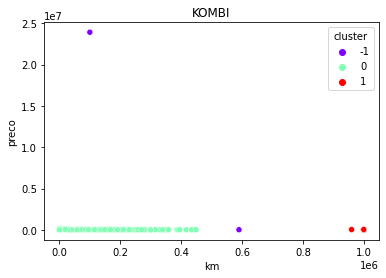


MODELO: FOX


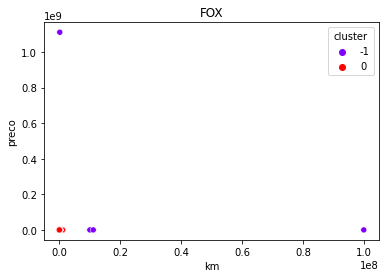


MODELO: TIGUAN


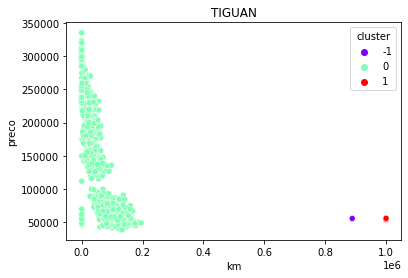


MODELO: CROSSFOX


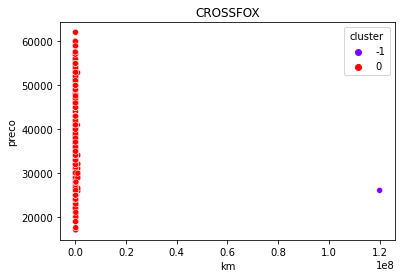


MODELO: PASSAT VARIANT


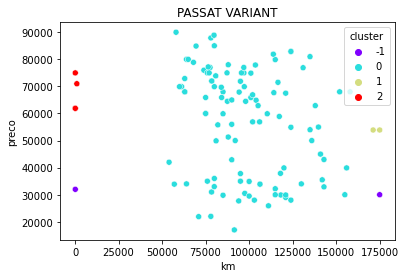


MODELO: POLO


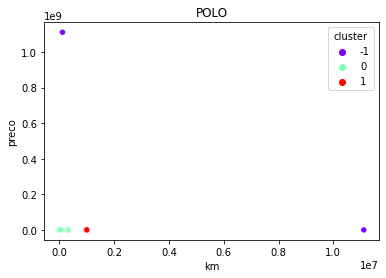


MODELO: SANTANA


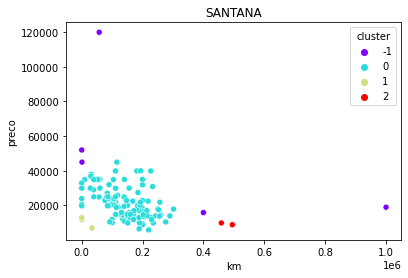


MODELO: VOYAGE


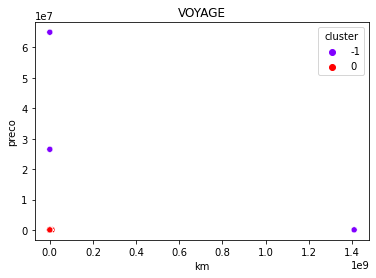


MODELO: PASSAT


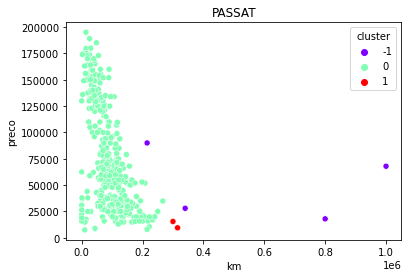


MODELO: JETTA


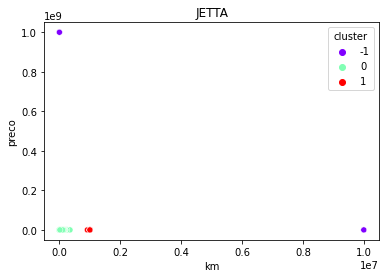


MODELO: T-CROSS


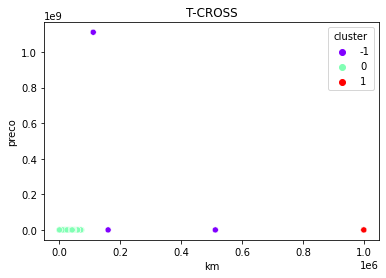


MODELO: SPACEFOX


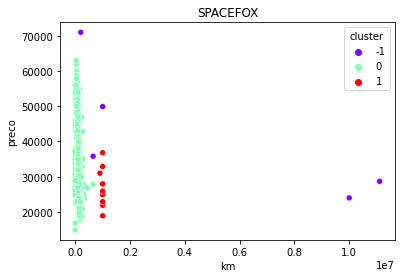


MODELO: GOL


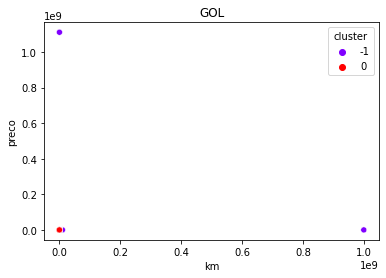


MODELO: AMAROK


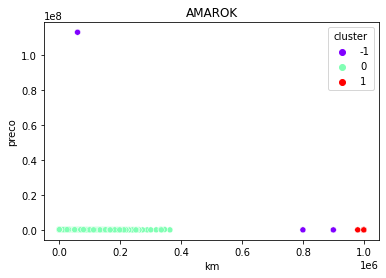


MODELO: UP


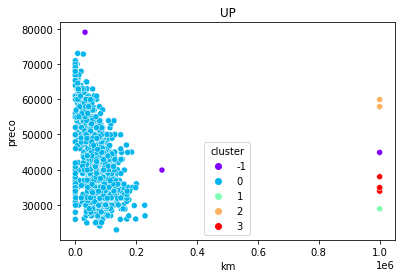


MODELO: POLO SEDAN


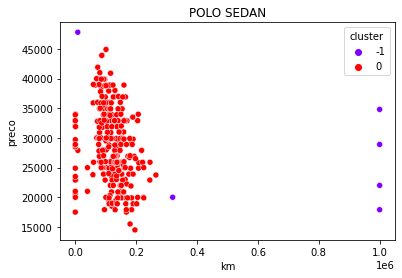


MODELO: GOLF


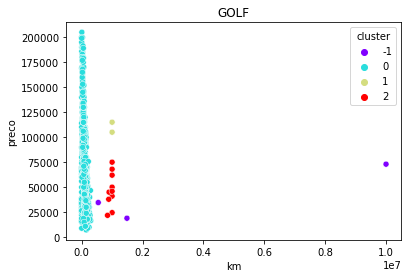


MODELO: VIRTUS


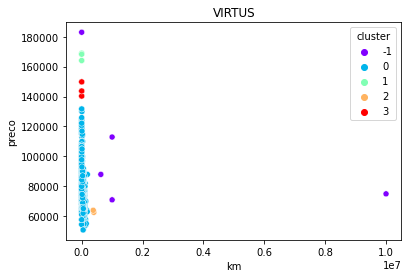


MODELO: BORA


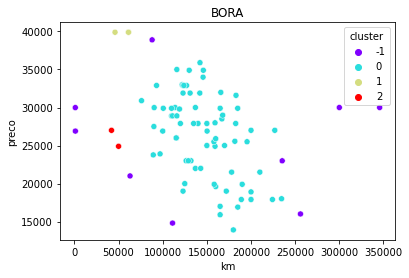


MODELO: FUSCA


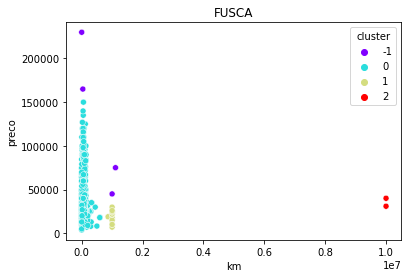


MODELO: TOUAREG


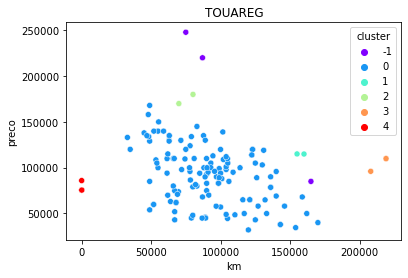


MODELO: SAVEIRO


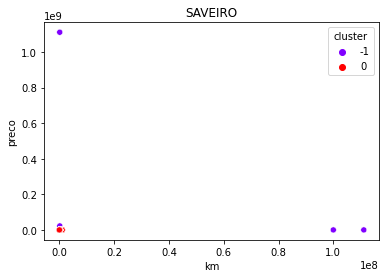


MODELO: NIVUS


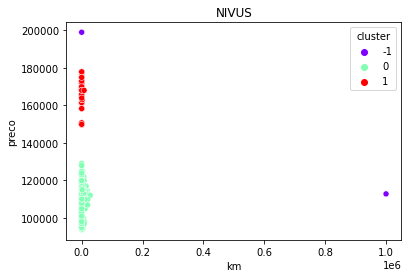


MODELO: CROSS UP


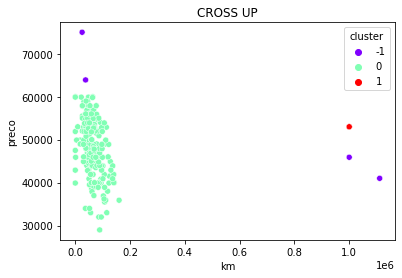


MODELO: NEW BEETLE


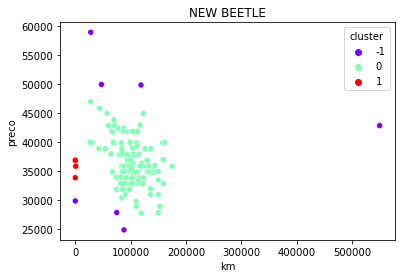


MODELO: POINTER


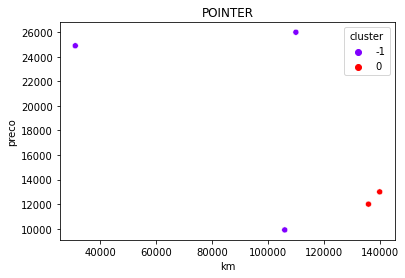


MODELO: VARIANT


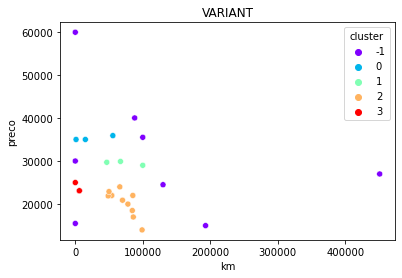


MODELO: SPACE CROSS


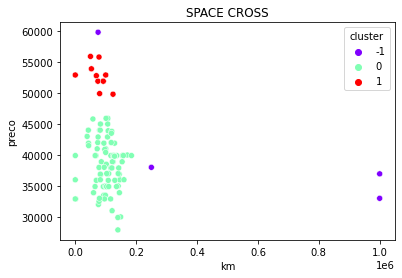


MODELO: BRASILIA


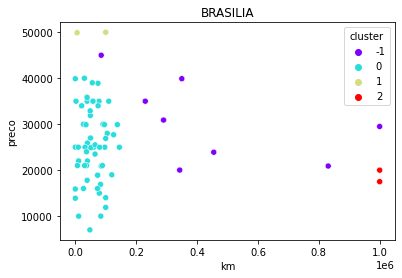


Há apenas um exemplar do modelo: CARAVELLE
Portanto, não é possível estudá-lo estatisticamente.

MODELO: QUANTUM


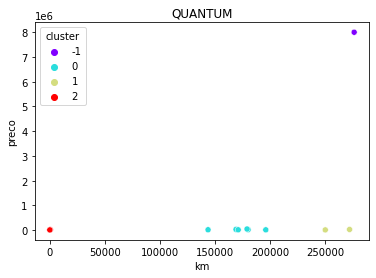


MODELO: LOGUS


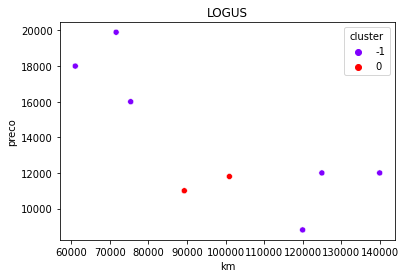


MODELO: BUGGY


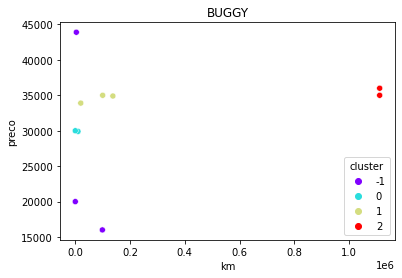


MODELO: KARMANN-GHIA


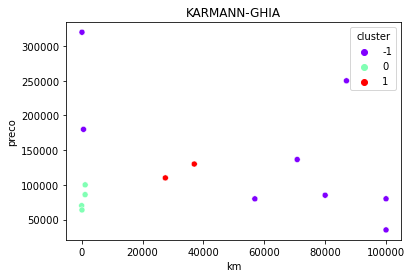


MODELO: TL


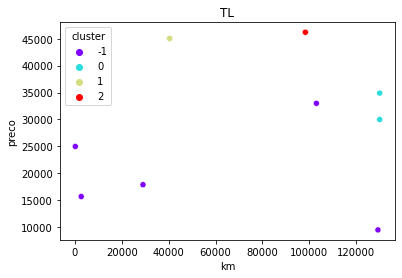


MODELO: VARIANT II


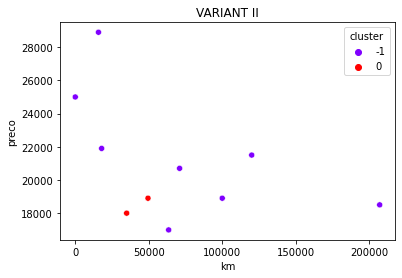


Há apenas um exemplar do modelo: EUROVAN
Portanto, não é possível estudá-lo estatisticamente.

MODELO: 1600


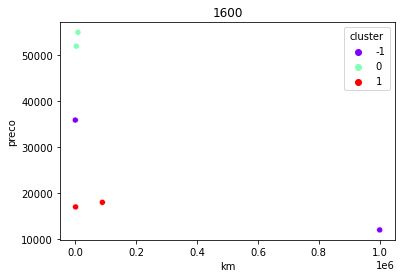


MODELO: APOLLO


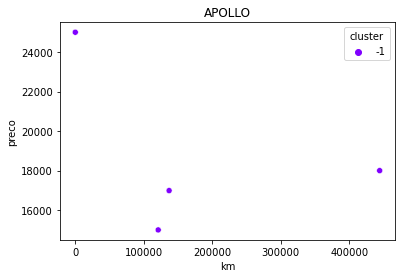


MODELO: EOS


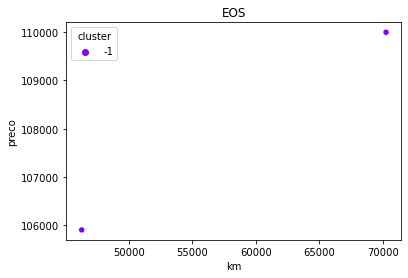


MODELO: 1300


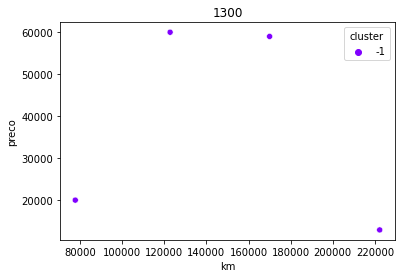


Há apenas um exemplar do modelo: VAN
Portanto, não é possível estudá-lo estatisticamente.

#############################################################
#############################################################
~~~~~~	Marca: CHEVROLET
#############################################################
#############################################################


MODELO: ONIX


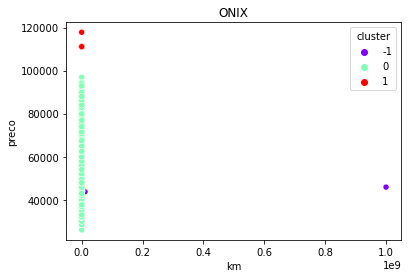


MODELO: OMEGA


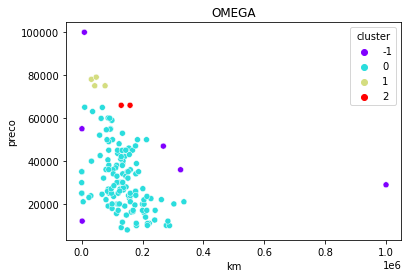


MODELO: ASTRA


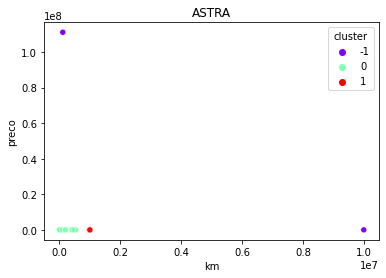


MODELO: VECTRA


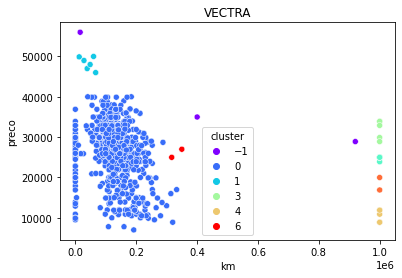


MODELO: CLASSIC


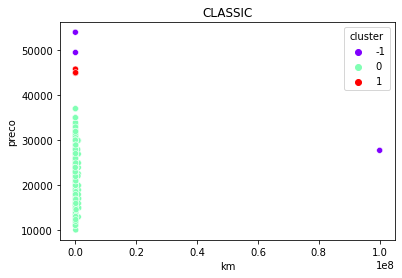


MODELO: BLAZER


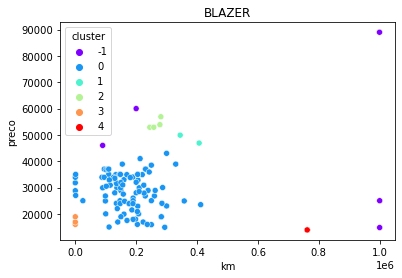


MODELO: CAPTIVA


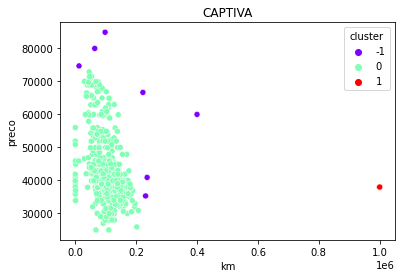


MODELO: CRUZE


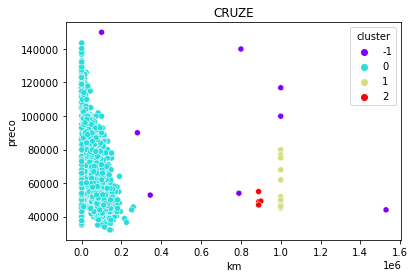


MODELO: TRACKER


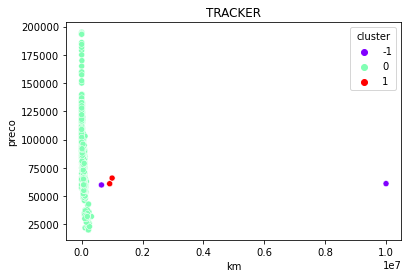


MODELO: MONZA


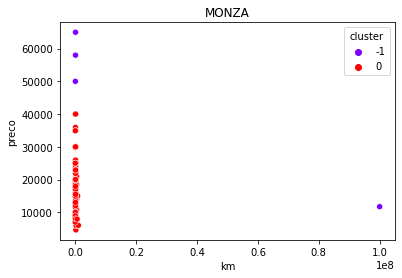


MODELO: CORSA


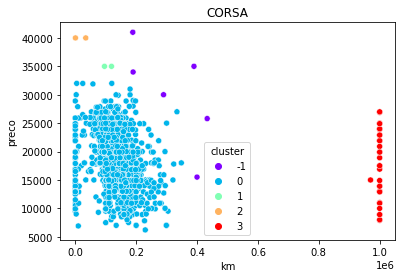


MODELO: PRISMA


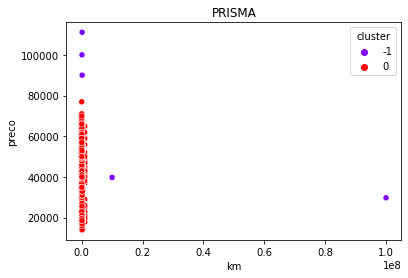


MODELO: COBALT


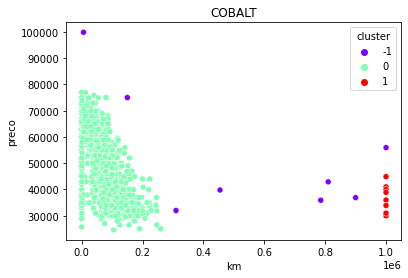


MODELO: S10


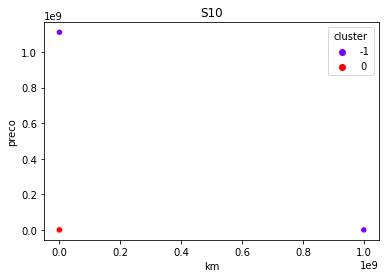


MODELO: SPIN


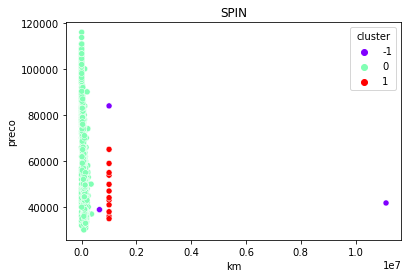


MODELO: CAMARO


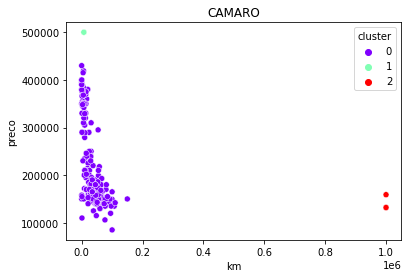


MODELO: EQUINOX


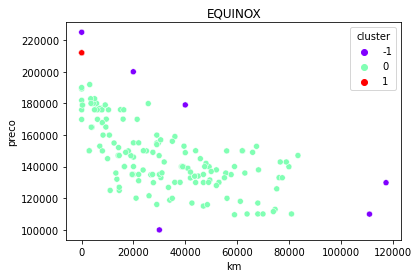


MODELO: SONIC


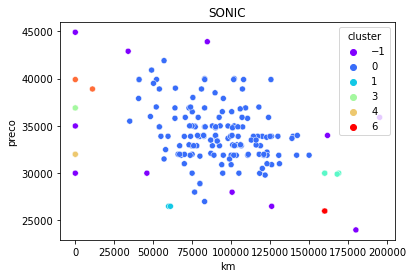


MODELO: D20


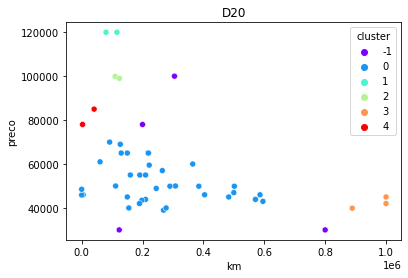


MODELO: CORVETTE GRAND SPORT


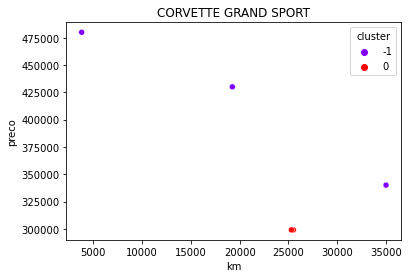


MODELO: JOY


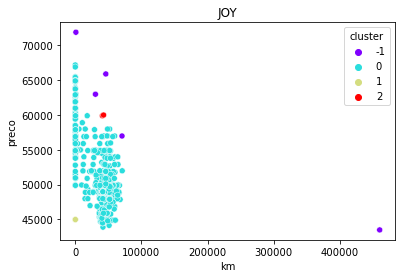


MODELO: ZAFIRA


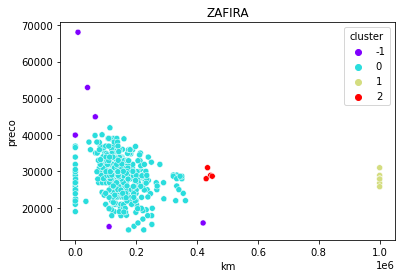


MODELO: MONTANA


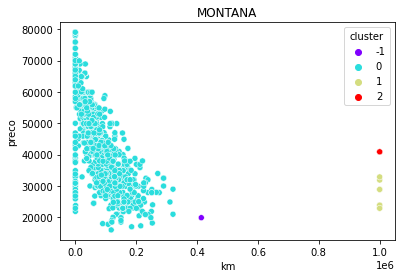


MODELO: MERIVA


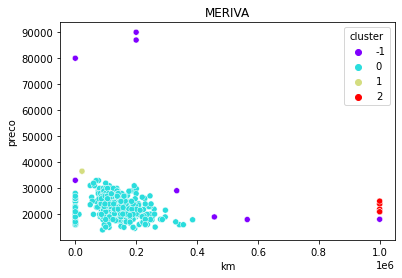


MODELO: AGILE


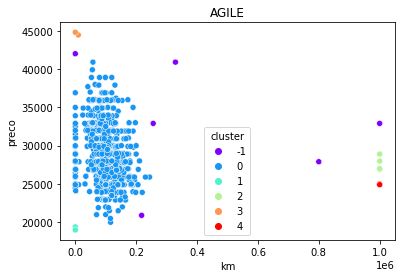


MODELO: TRAILBLAZER


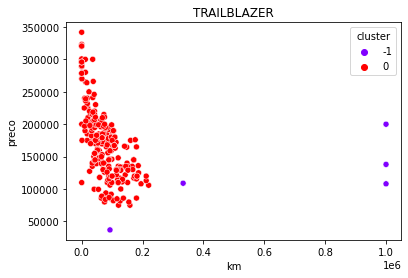


MODELO: MALIBU


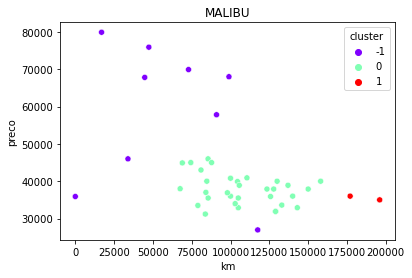


MODELO: SUPREMA


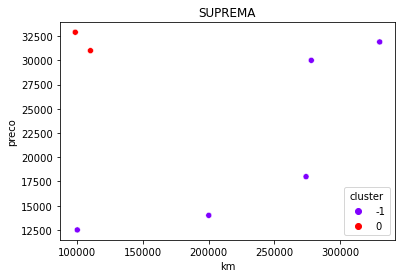


MODELO: OPALA


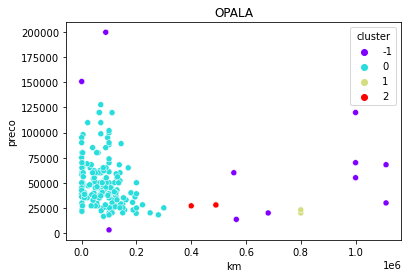


MODELO: CELTA


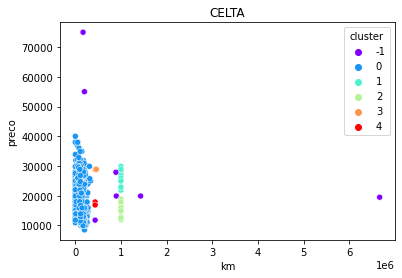


MODELO: CORVETTE


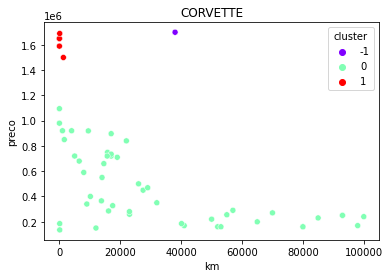


MODELO: C14


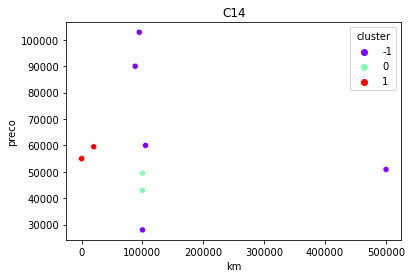


MODELO: IMPALA


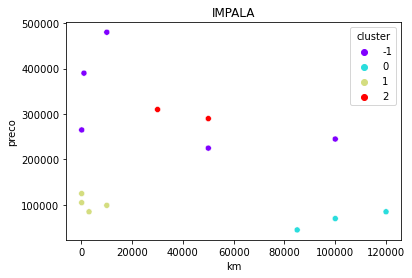


MODELO: IPANEMA


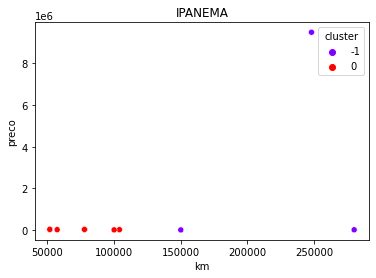


MODELO: GRAND BLAZER


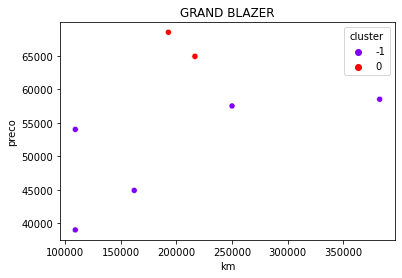


MODELO: CHEVETTE


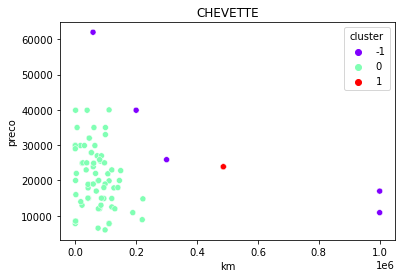


MODELO: SILVERADO


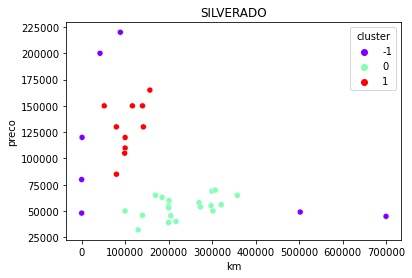


MODELO: D10


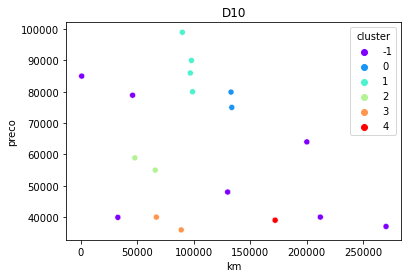


MODELO: KADETT


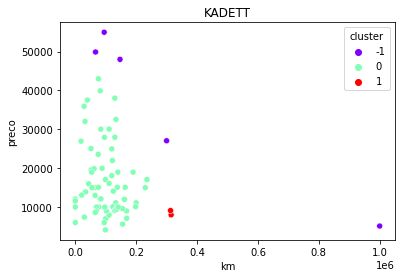


MODELO: BONANZA


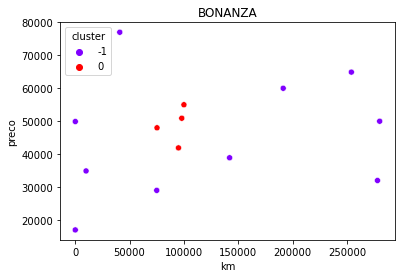


MODELO: SUBURBAN


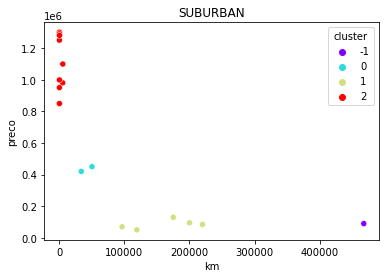


MODELO: TIGRA


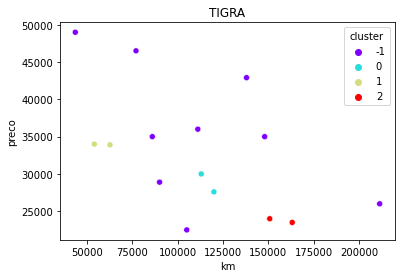


MODELO: TAHOE


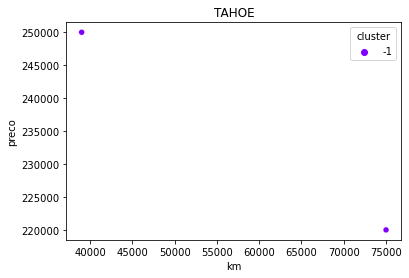


MODELO: A20


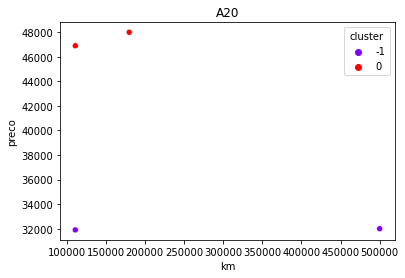


MODELO: VERANEIO


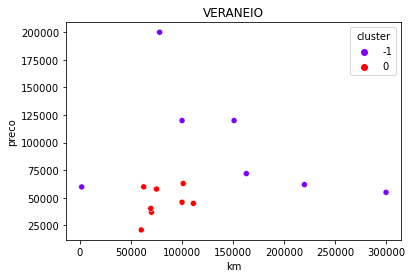


MODELO: CARAVAN


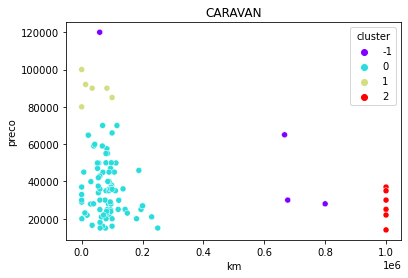


Há apenas um exemplar do modelo: SPACE VAN
Portanto, não é possível estudá-lo estatisticamente.

MODELO: CHEVY 500


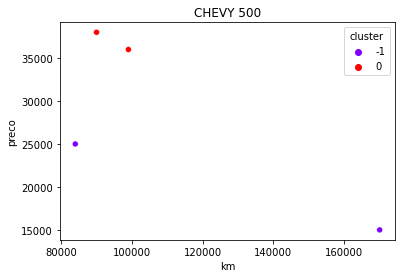


MODELO: C10


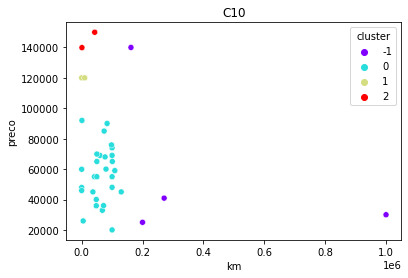


MODELO: BEL AIR


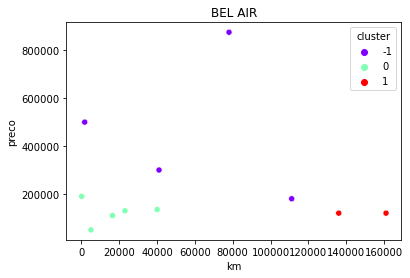


MODELO: D40


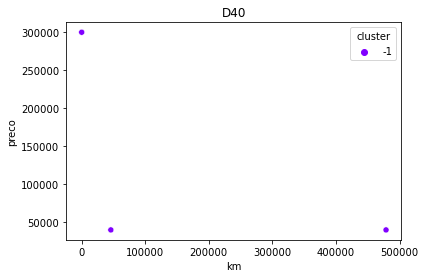


MODELO: CHEVELLE


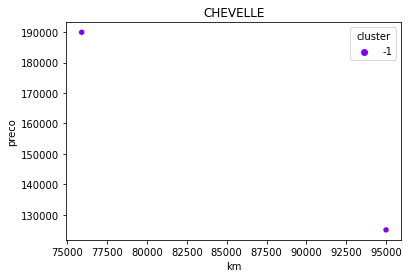


Há apenas um exemplar do modelo: C20
Portanto, não é possível estudá-lo estatisticamente.

MODELO: STYLELINE


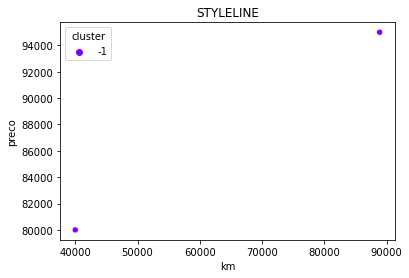


MODELO: BRASIL


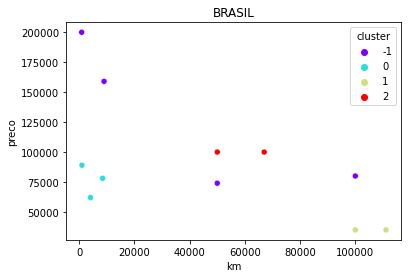


Há apenas um exemplar do modelo: VEGA
Portanto, não é possível estudá-lo estatisticamente.

MODELO: FLEETLINE


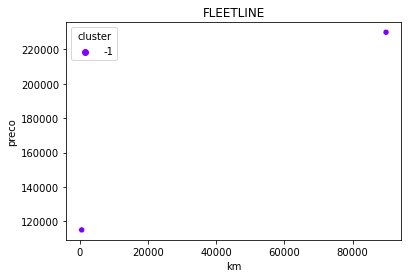


MODELO: SS


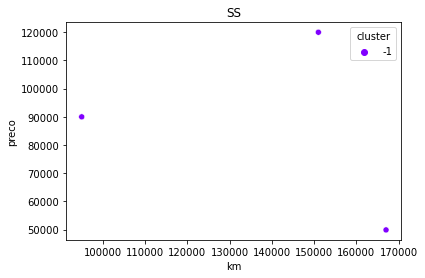


MODELO: A10


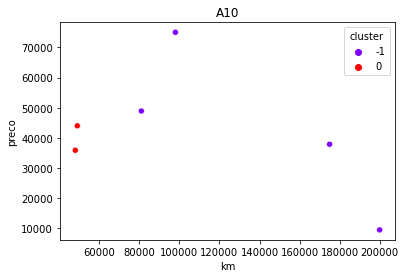


MODELO: BOLT


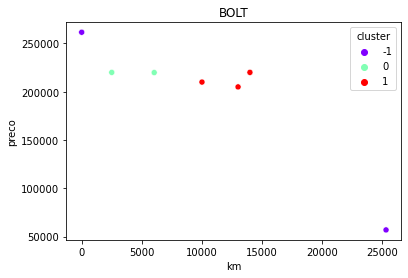


Há apenas um exemplar do modelo: CALIBRA
Portanto, não é possível estudá-lo estatisticamente.

MODELO: C15


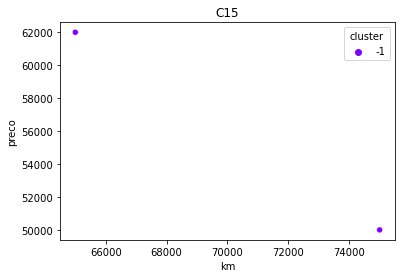


MODELO: MASTER


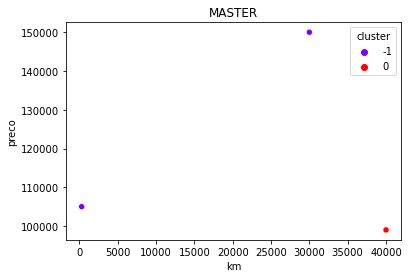


MODELO: EL CAMINO


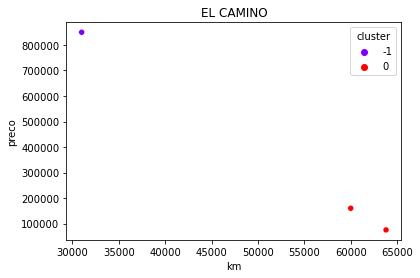


Há apenas um exemplar do modelo: CAPRICE
Portanto, não é possível estudá-lo estatisticamente.

MODELO: DE LUXE


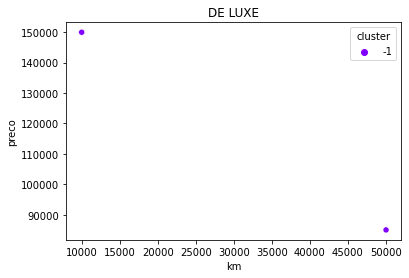


MODELO: AVALANCHE


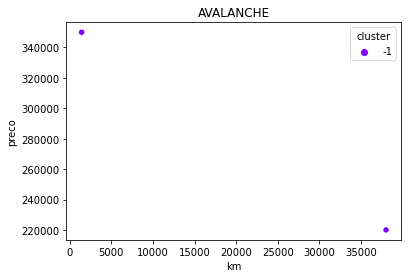


MODELO: HHR


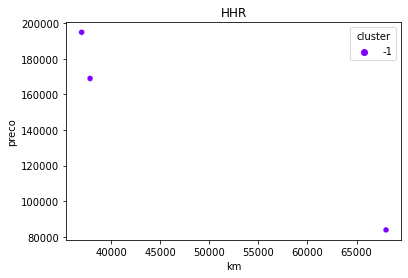


MODELO: SSR


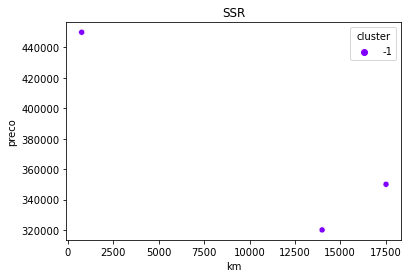


Há apenas um exemplar do modelo: AMAZONA
Portanto, não é possível estudá-lo estatisticamente.

MODELO: MARAJÓ


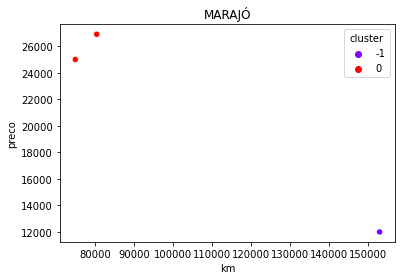


MODELO: BRASINCA


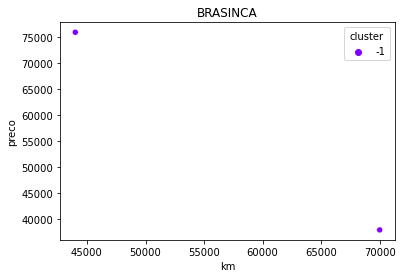


Há apenas um exemplar do modelo: COUPÉ
Portanto, não é possível estudá-lo estatisticamente.

Há apenas um exemplar do modelo: LUMINA
Portanto, não é possível estudá-lo estatisticamente.

Há apenas um exemplar do modelo: STYLEMASTER
Portanto, não é possível estudá-lo estatisticamente.

Há apenas um exemplar do modelo: RAMONA
Portanto, não é possível estudá-lo estatisticamente.

Há apenas um exemplar do modelo: CHEYENNE
Portanto, não é possível estudá-lo estatisticamente.

#############################################################
#############################################################
~~~~~~	Marca: FORD
#############################################################
#############################################################


MODELO: FIESTA


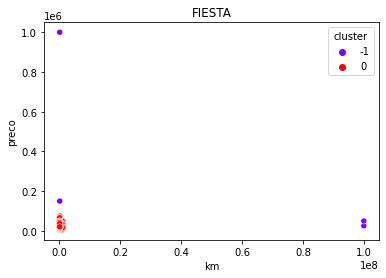


MODELO: FOCUS


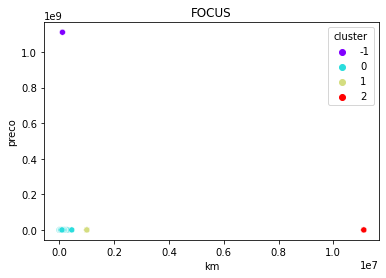


MODELO: FUSION


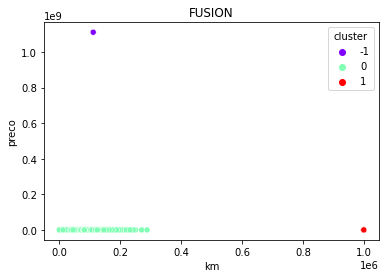


MODELO: ECOSPORT


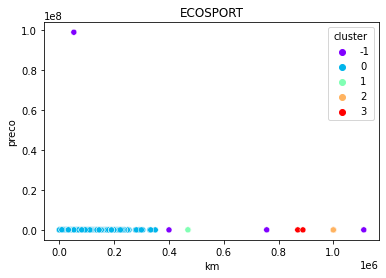


MODELO: KA


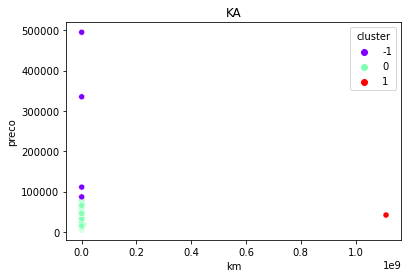


MODELO: EDGE


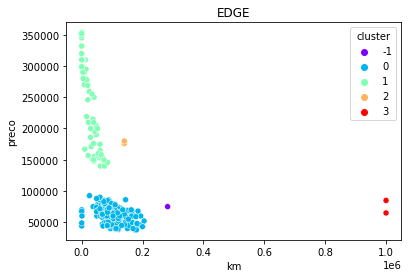


MODELO: RANGER


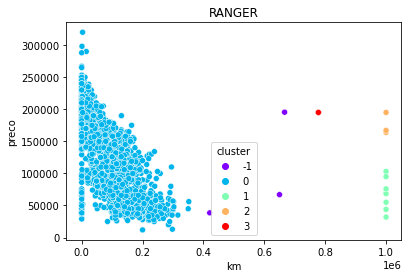


MODELO: F-4000


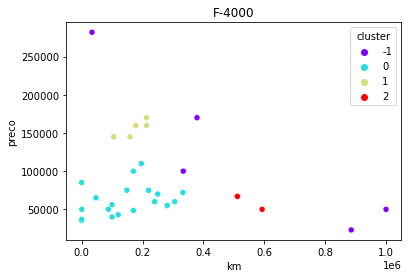


MODELO: TRANSIT


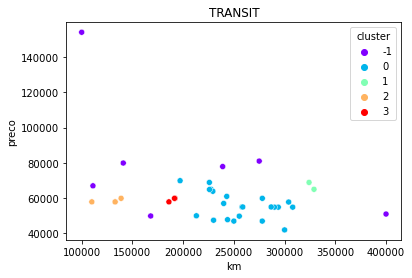


Há apenas um exemplar do modelo: F-MAXX
Portanto, não é possível estudá-lo estatisticamente.

MODELO: MUSTANG


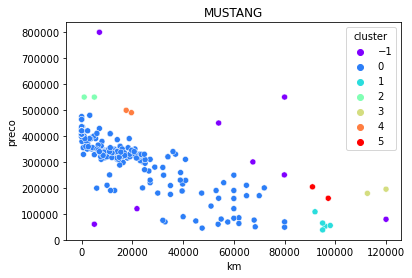


MODELO: ESCORT


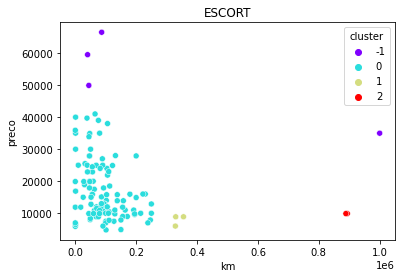


MODELO: KA +


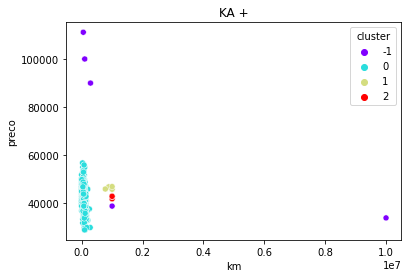


MODELO: TERRITORY


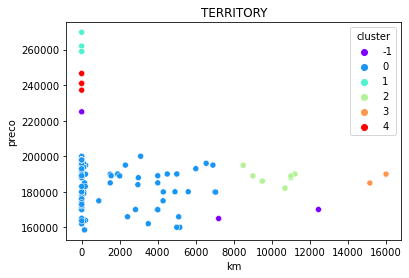


MODELO: F-250


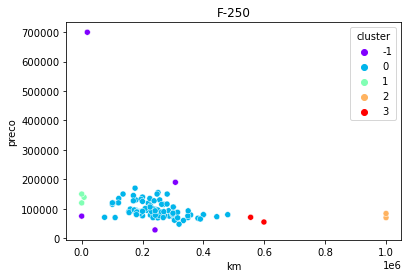


MODELO: F-1000


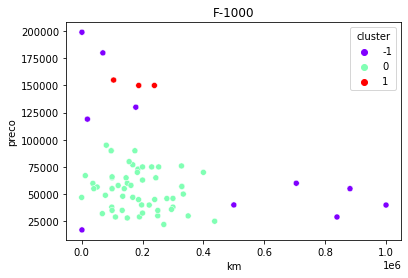


MODELO: JEEP


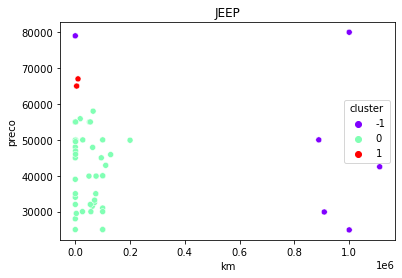


MODELO: LANDAU


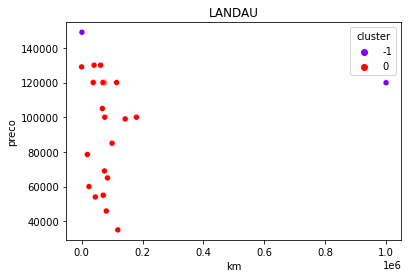


MODELO: MAVERICK


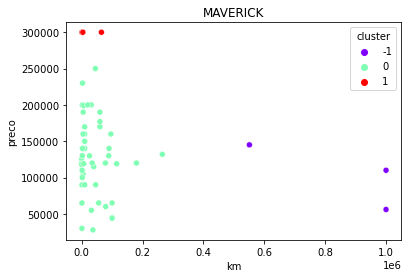


MODELO: CORCEL


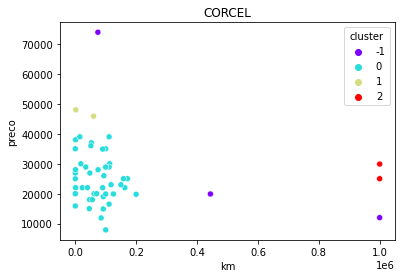


MODELO: GALAXIE


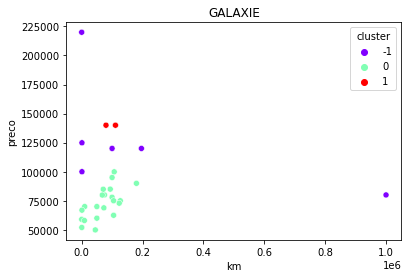


MODELO: F-75


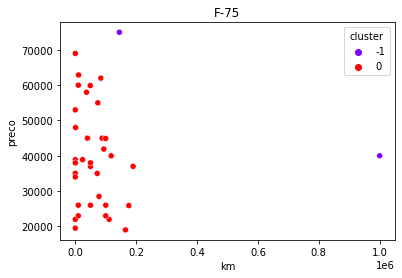


MODELO: F-150


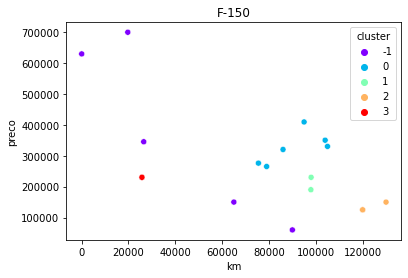


MODELO: TAURUS


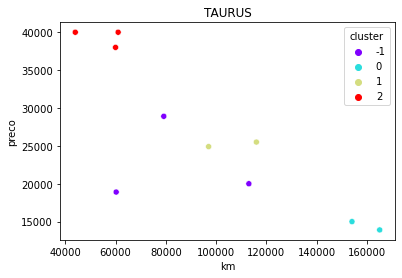


MODELO: MONDEO


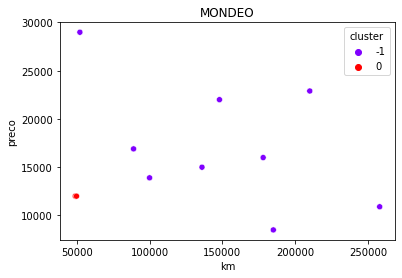


MODELO: DEL REY


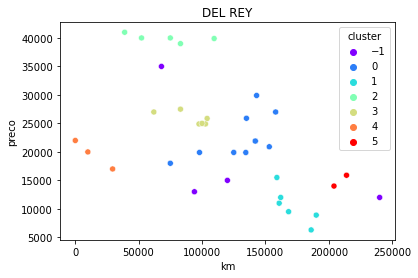


Há apenas um exemplar do modelo: ROYALE
Portanto, não é possível estudá-lo estatisticamente.

MODELO: F-100


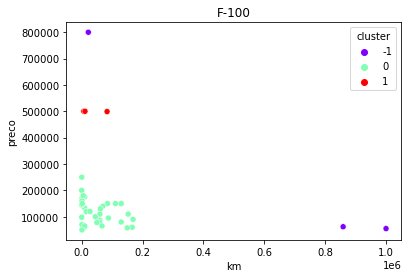


MODELO: ENCOLINE E 350


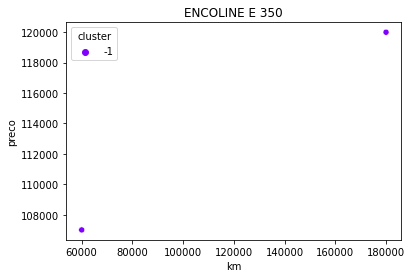


MODELO: COURIER


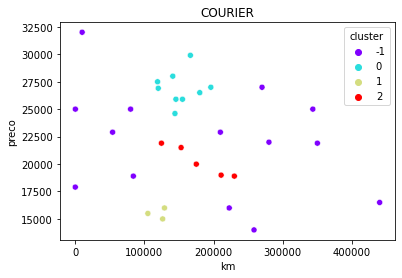


MODELO: F-1


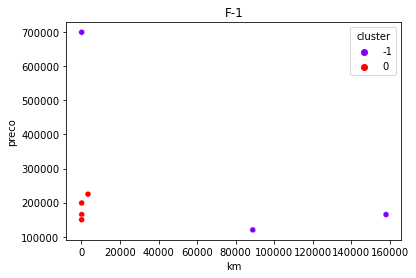


MODELO: VERONA


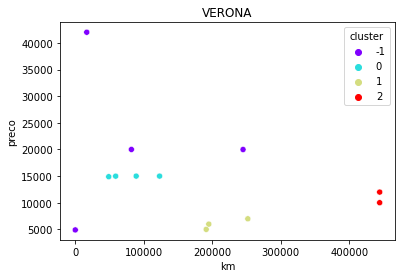


MODELO: CUPÊ


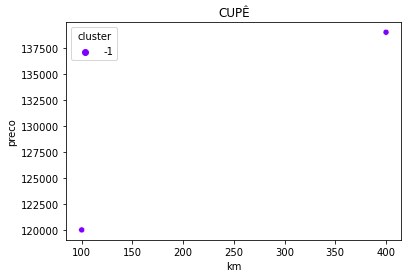


MODELO: RURAL


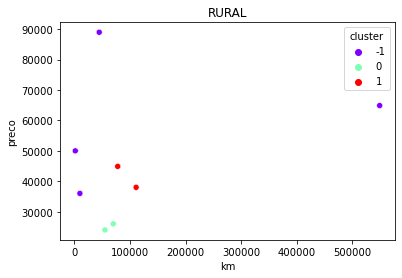


MODELO: CORCEL II


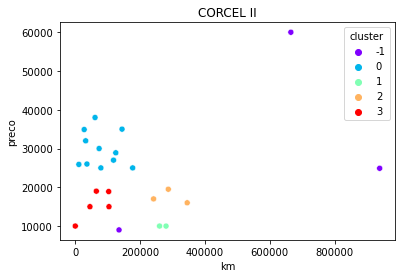


MODELO: THUNDERBIRD


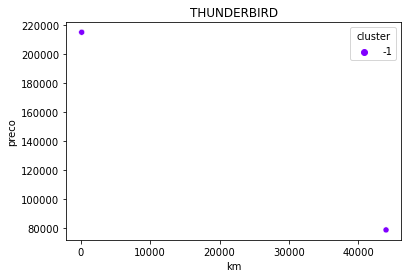


MODELO: F-350


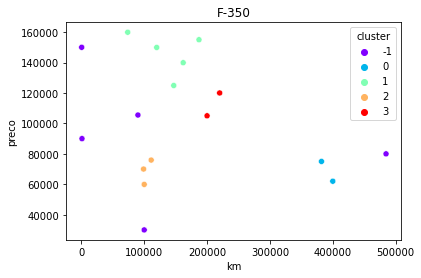


MODELO: PAMPA


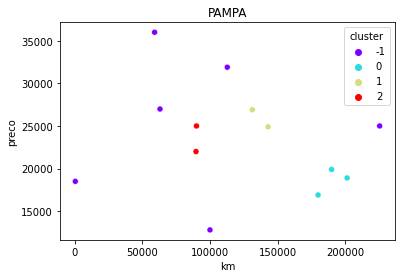


MODELO: BELINA


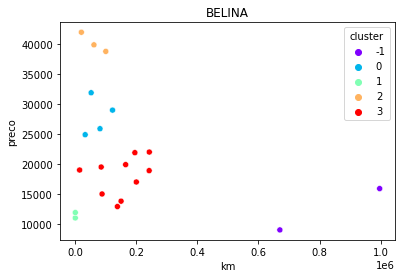


MODELO: VERSAILLES


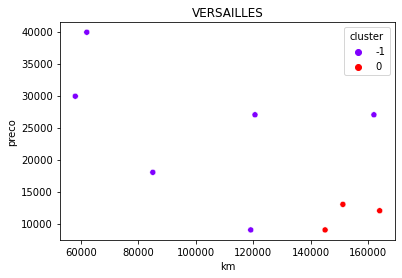


MODELO: A


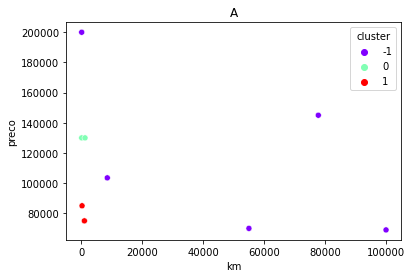


MODELO: EXPLORER


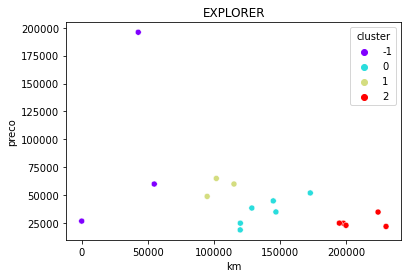


Há apenas um exemplar do modelo: T
Portanto, não é possível estudá-lo estatisticamente.

MODELO: PHAETON


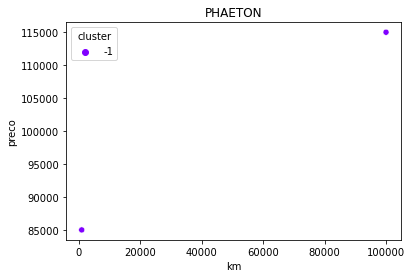


Há apenas um exemplar do modelo: WINDSTAR
Portanto, não é possível estudá-lo estatisticamente.

Há apenas um exemplar do modelo: CROWN VICTORIA
Portanto, não é possível estudá-lo estatisticamente.

Há apenas um exemplar do modelo: MUSTANG V6
Portanto, não é possível estudá-lo estatisticamente.

MODELO: TUDOR


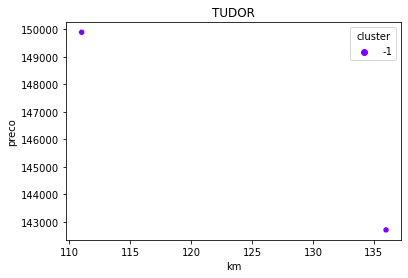


Há apenas um exemplar do modelo: CONTOUR
Portanto, não é possível estudá-lo estatisticamente.

Há apenas um exemplar do modelo: ESCAPE
Portanto, não é possível estudá-lo estatisticamente.

Há apenas um exemplar do modelo: SUPER DELUXE
Portanto, não é possível estudá-lo estatisticamente.

Há apenas um exemplar do modelo: CONSUL
Portanto, não é possível estudá-lo estatisticamente.

Há apenas um exemplar do modelo: VICTORIA
Portanto, não é possível estudá-lo estatisticamente.

#############################################################
#############################################################
~~~~~~	Marca: FIAT
#############################################################
#############################################################


MODELO: SIENA


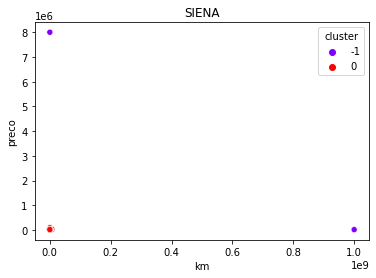


MODELO: PUNTO


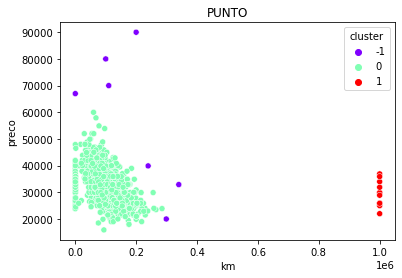


MODELO: STILO


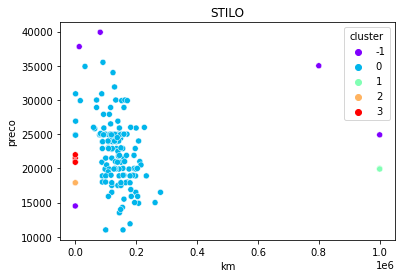


MODELO: UNO


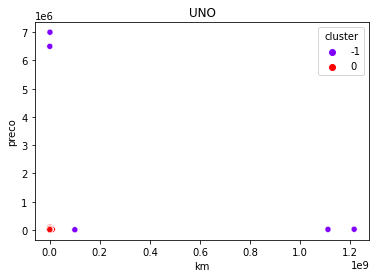


MODELO: IDEA


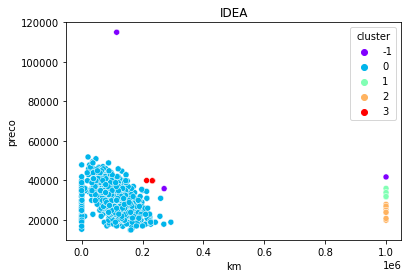


MODELO: PALIO


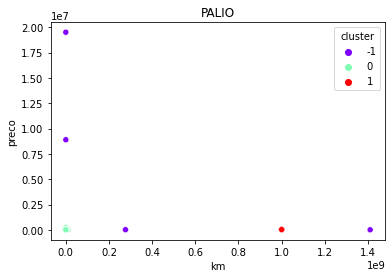


MODELO: ARGO


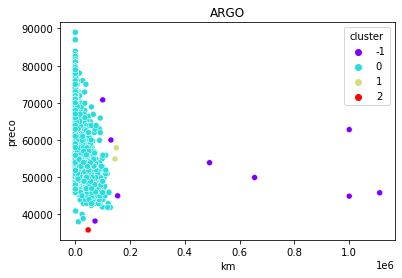


MODELO: LINEA


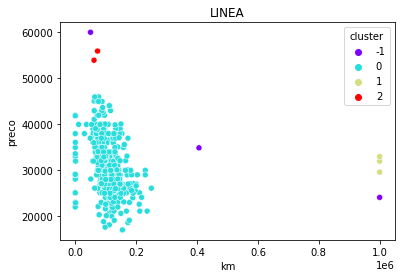


MODELO: DOBLÒ


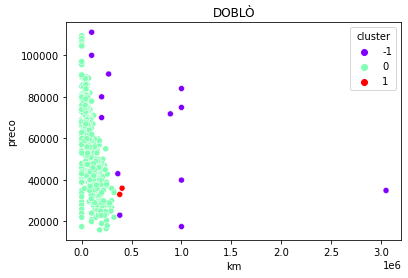


MODELO: DUCATO


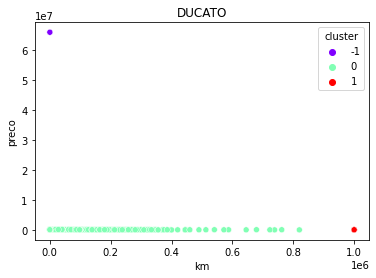


MODELO: CRONOS


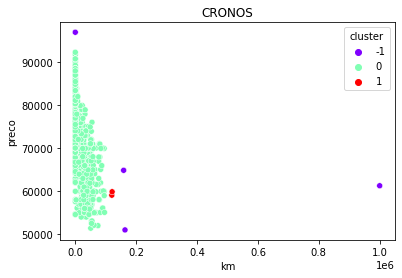


MODELO: MOBI


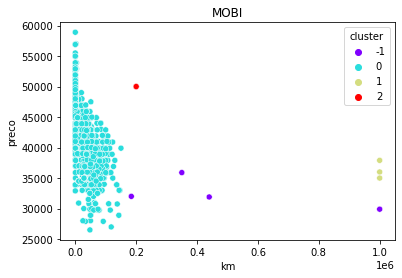


MODELO: GRAND SIENA


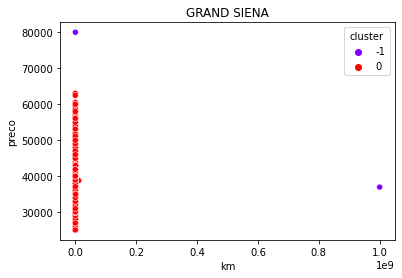


MODELO: BRAVO


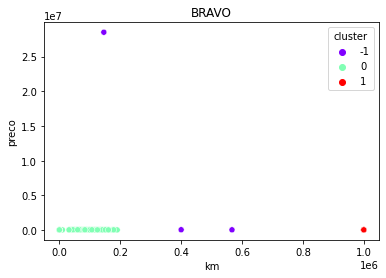


MODELO: TORO


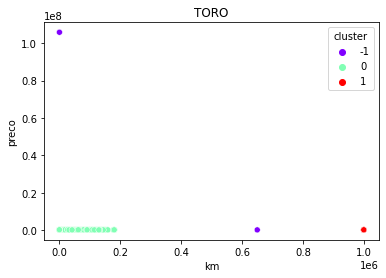


MODELO: STRADA


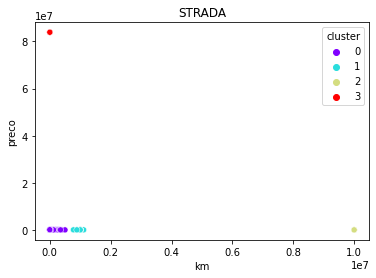


MODELO: FREEMONT


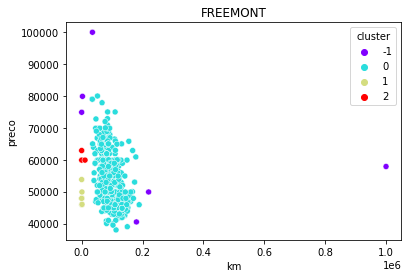


MODELO: 500


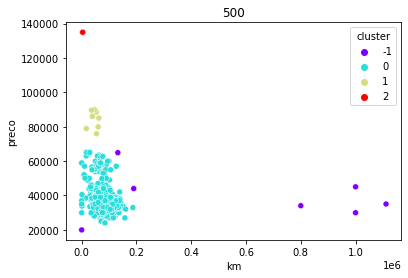


MODELO: FIORINO


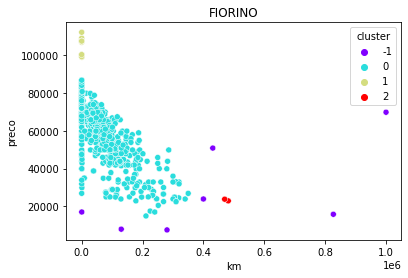


MODELO: MAREA


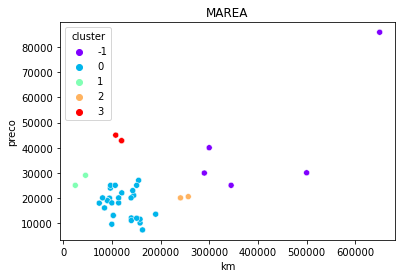


MODELO: TEMPRA


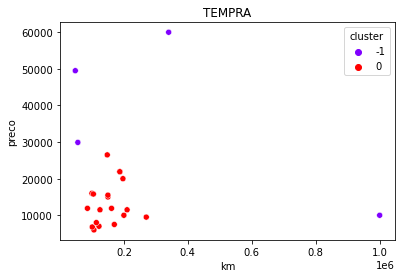


MODELO: 147


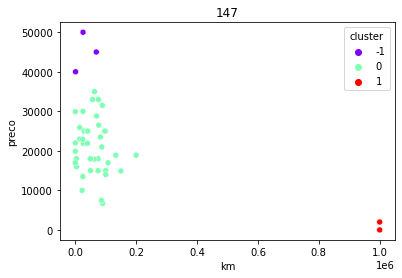


MODELO: COUPÉ


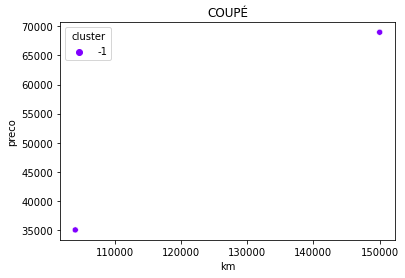


MODELO: PREMIO


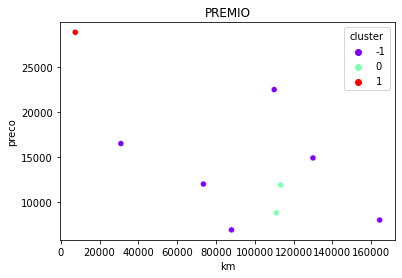


MODELO: TIPO


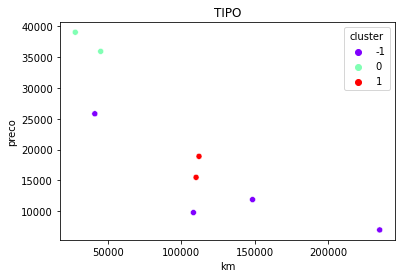


MODELO: ELBA


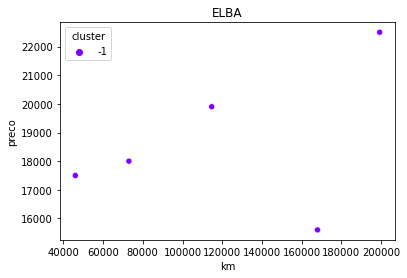


Há apenas um exemplar do modelo: SPAZIO
Portanto, não é possível estudá-lo estatisticamente.

MODELO: BRAVA


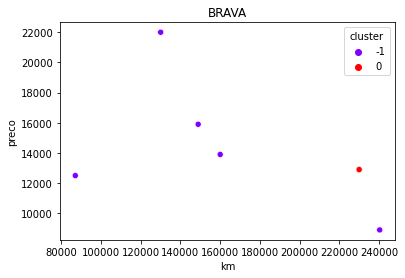


MODELO: PANORAMA


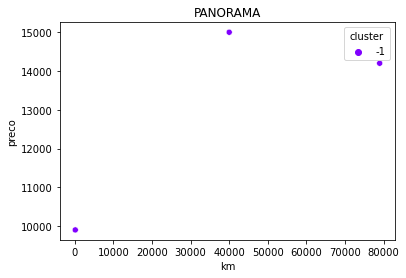


MODELO: OGGI


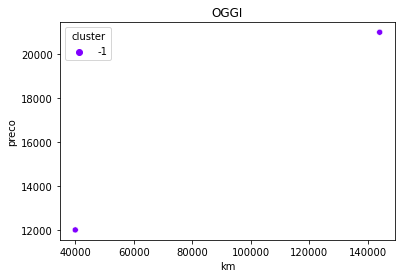


Há apenas um exemplar do modelo: 600
Portanto, não é possível estudá-lo estatisticamente.

#############################################################
#############################################################
~~~~~~	Marca: RENAULT
#############################################################
#############################################################


MODELO: MASTER


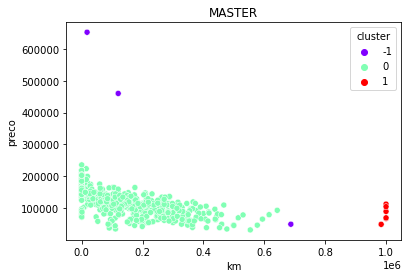


MODELO: SYMBOL


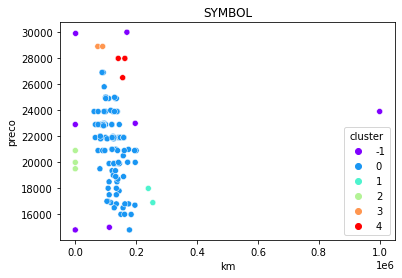


MODELO: CLIO


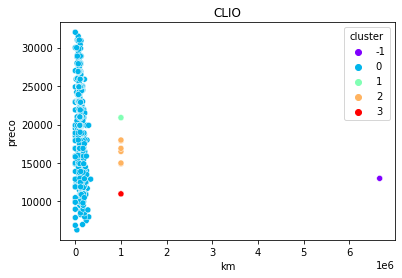


MODELO: GRAND SCÉNIC


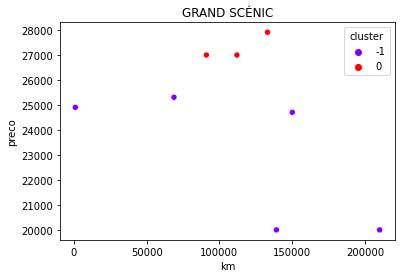


MODELO: SCÉNIC


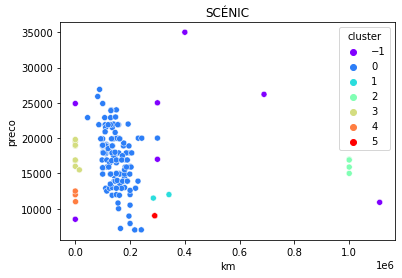


MODELO: MÉGANE


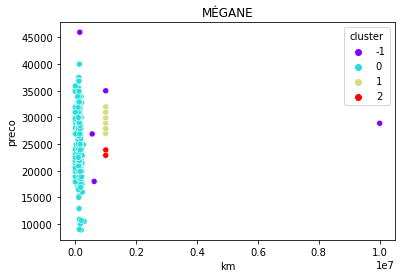


MODELO: LOGAN


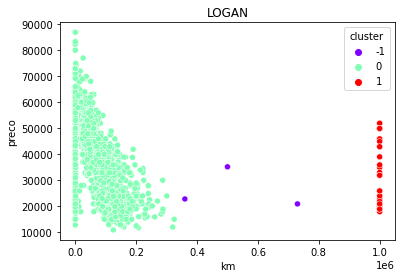


MODELO: DUSTER


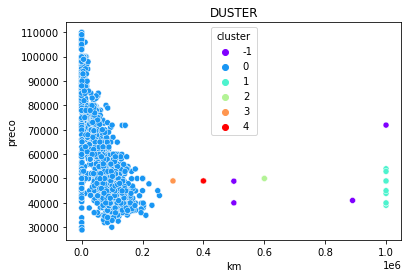


MODELO: SANDERO


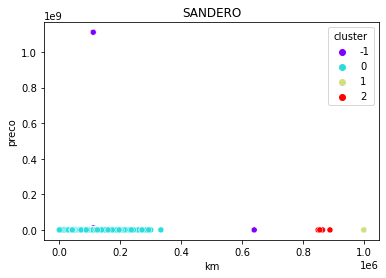


MODELO: FLUENCE


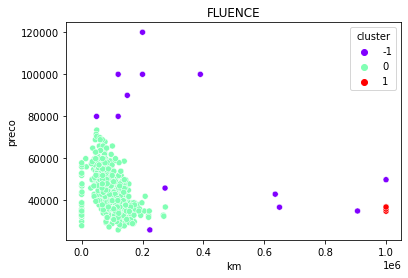


MODELO: CAPTUR


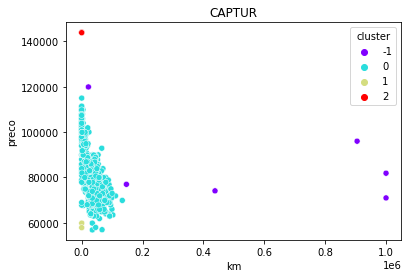


MODELO: KWID


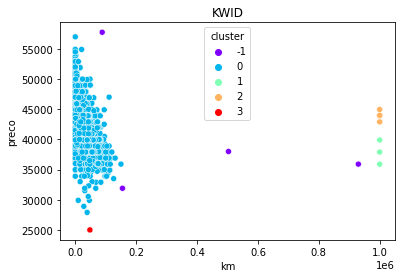


MODELO: DUSTER OROCH


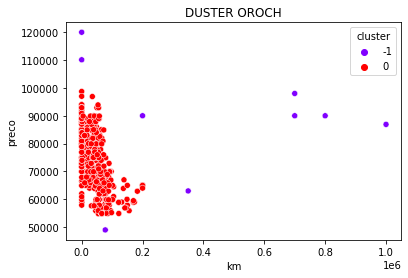


MODELO: KANGOO


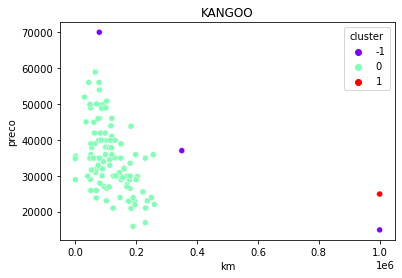


MODELO: ZOE


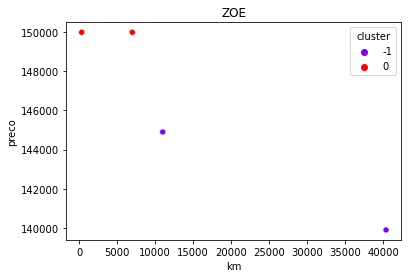


MODELO: TWINGO


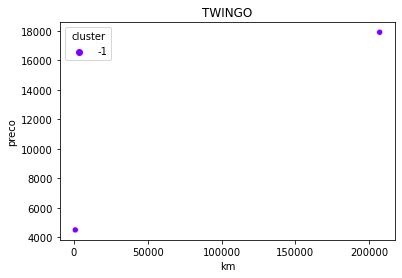


Há apenas um exemplar do modelo: JUVAQUATRE
Portanto, não é possível estudá-lo estatisticamente.

MODELO: LAGUNA


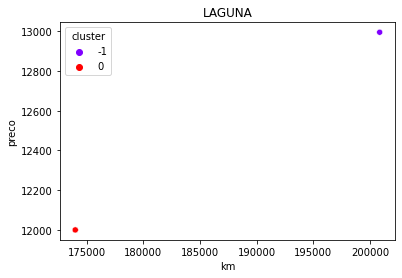


MODELO: TRAFIC


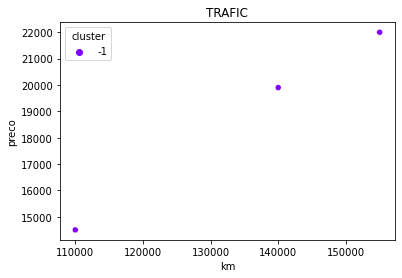


Há apenas um exemplar do modelo: 21
Portanto, não é possível estudá-lo estatisticamente.

Há apenas um exemplar do modelo: EXPRESS
Portanto, não é possível estudá-lo estatisticamente.

Há apenas um exemplar do modelo: GORDINI
Portanto, não é possível estudá-lo estatisticamente.

#############################################################
#############################################################
~~~~~~	Marca: HYUNDAI
#############################################################
#############################################################


MODELO: EQUUS


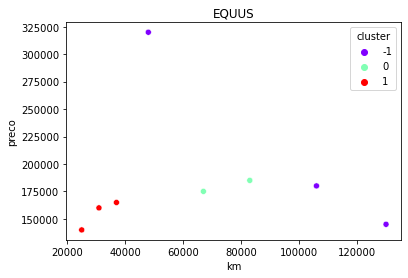


MODELO: VELOSTER


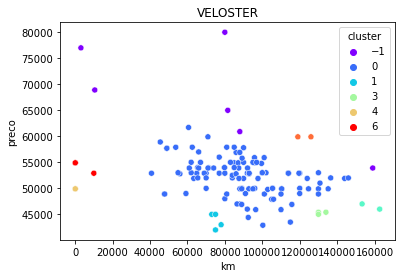


MODELO: SANTA FÉ


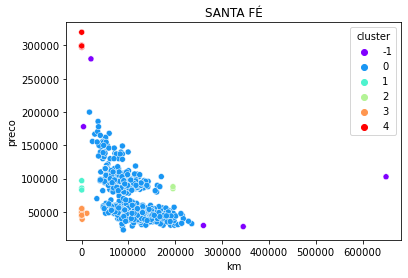


MODELO: AZERA


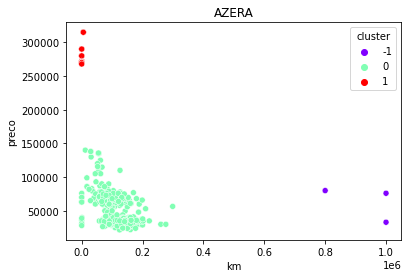


MODELO: HB20S


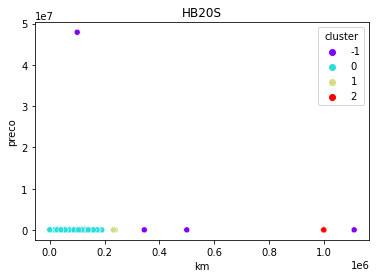


MODELO: TUCSON


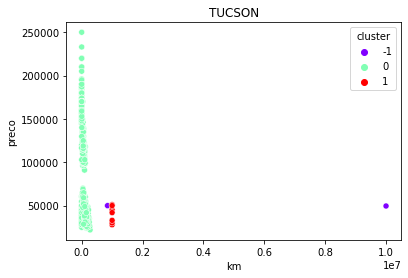


MODELO: CRETA


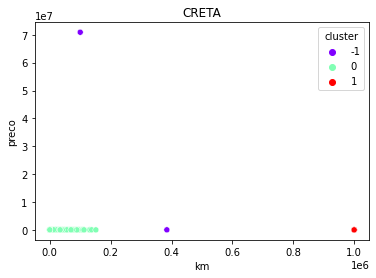


MODELO: HR


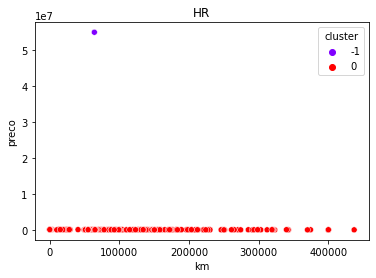


MODELO: HB20


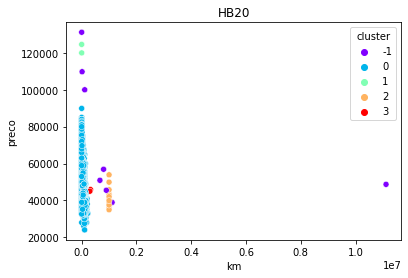


MODELO: IX35


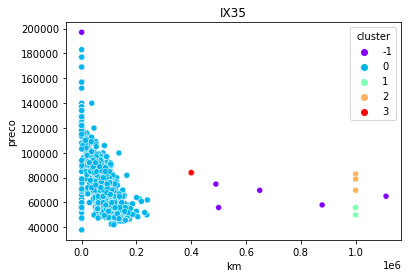


MODELO: ELANTRA


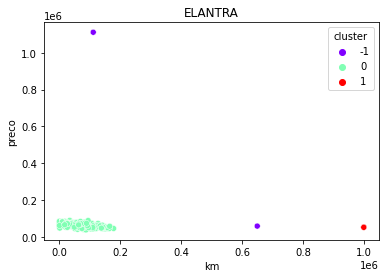


MODELO: VERACRUZ


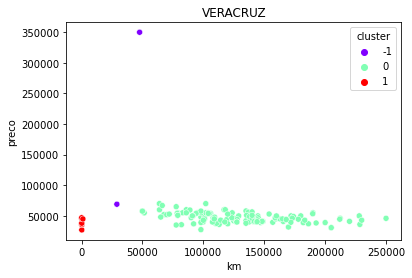


MODELO: GENESIS


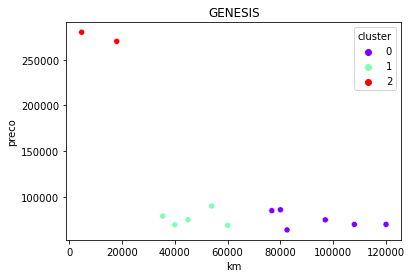


MODELO: I30


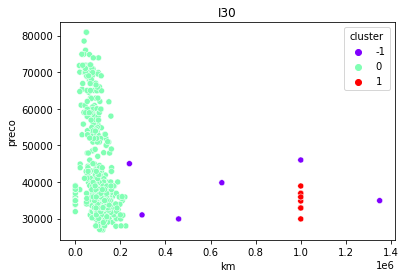


MODELO: HB20X


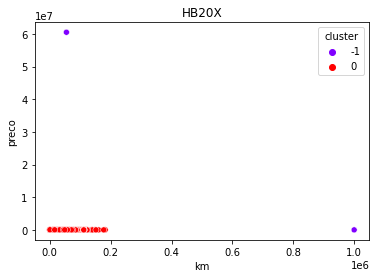


MODELO: GRAND SANTA FÉ


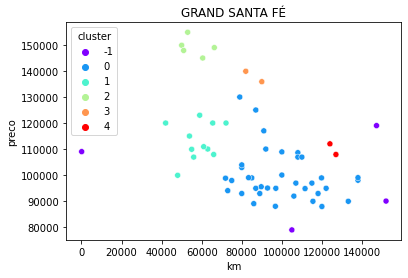


MODELO: SONATA


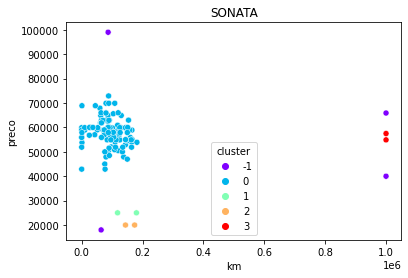


MODELO: H100


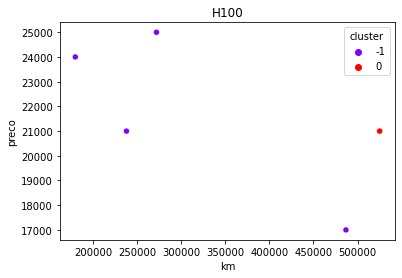


MODELO: I30 CW


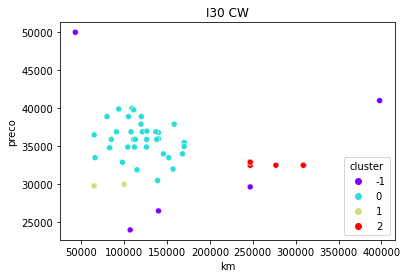


MODELO: GALLOPER


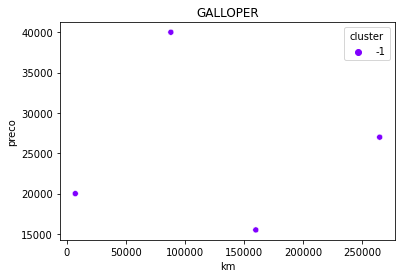


MODELO: H1 STAREX


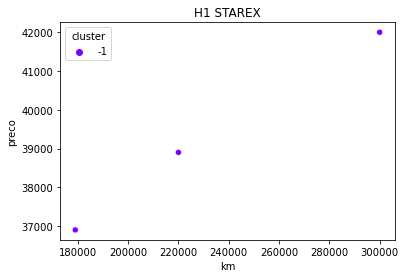


MODELO: TERRACAN


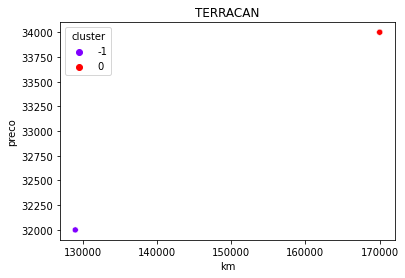


Há apenas um exemplar do modelo: ACCENT
Portanto, não é possível estudá-lo estatisticamente.

Há apenas um exemplar do modelo: ATOS
Portanto, não é possível estudá-lo estatisticamente.

MODELO: COUPÊ


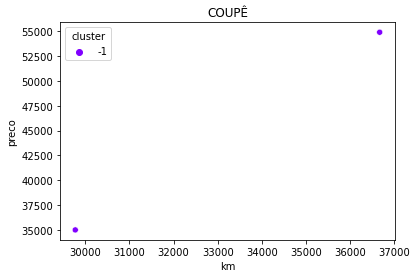


Há apenas um exemplar do modelo: TIBURON
Portanto, não é possível estudá-lo estatisticamente.

#############################################################
#############################################################
~~~~~~	Marca: TOYOTA
#############################################################
#############################################################


MODELO: COROLLA


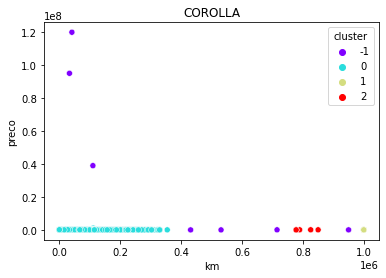


MODELO: HILUX SW4


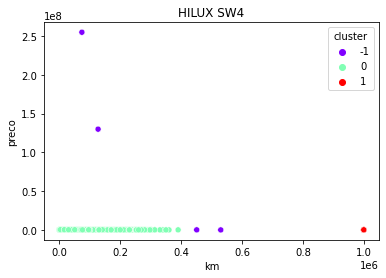


MODELO: ETIOS


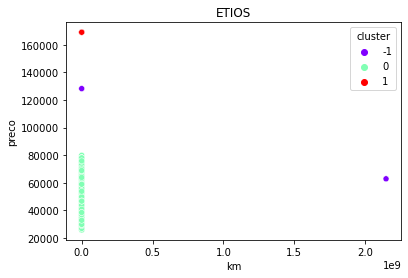


MODELO: HILUX


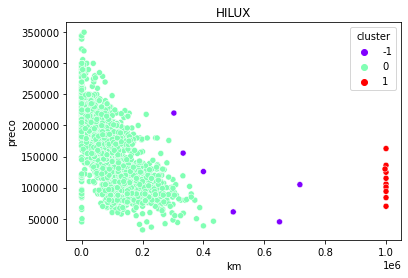


MODELO: YARIS


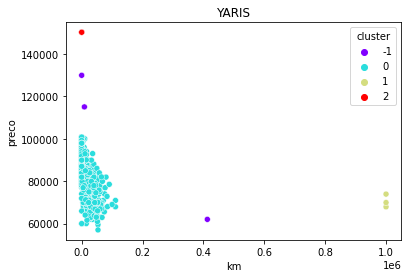


MODELO: PRIUS


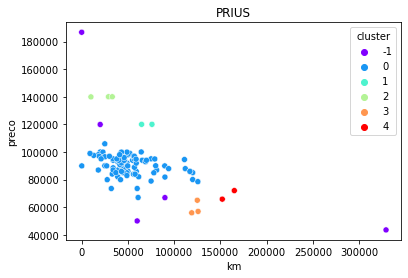


MODELO: RAV4


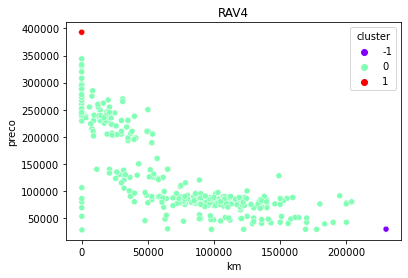


MODELO: CAMRY


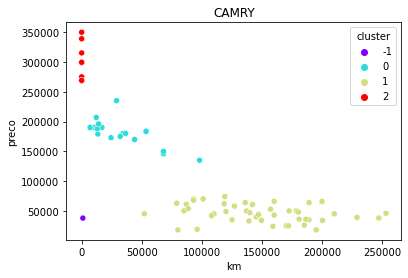


MODELO: BANDEIRANTE


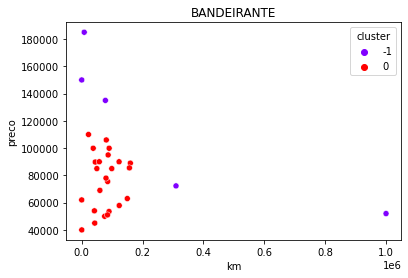


MODELO: FIELDER


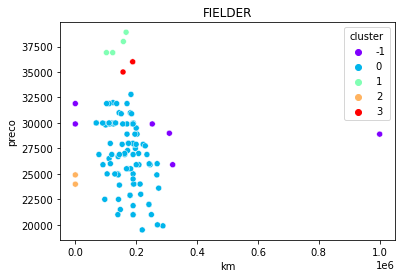


MODELO: ETIOS CROSS


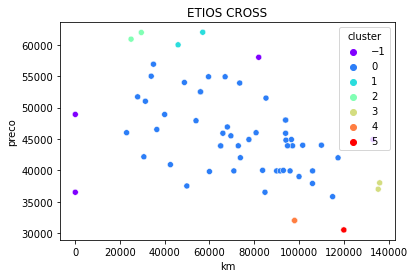


MODELO: COROLLA CROSS


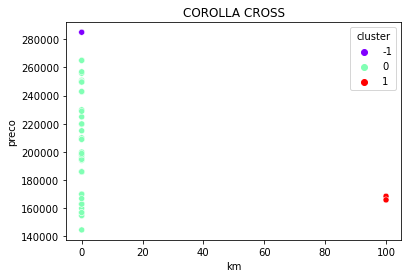


MODELO: TUNDRA


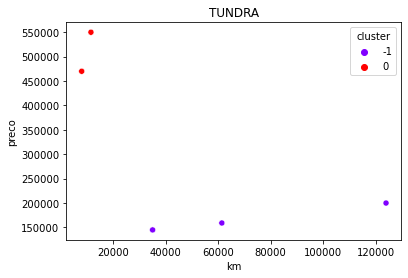


MODELO: LAND CRUISER PRADO


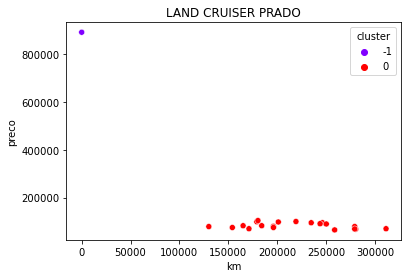


Há apenas um exemplar do modelo: CORONA
Portanto, não é possível estudá-lo estatisticamente.

Há apenas um exemplar do modelo: VENZA
Portanto, não é possível estudá-lo estatisticamente.

Há apenas um exemplar do modelo: TACOMA
Portanto, não é possível estudá-lo estatisticamente.

MODELO: FJ CRUISER


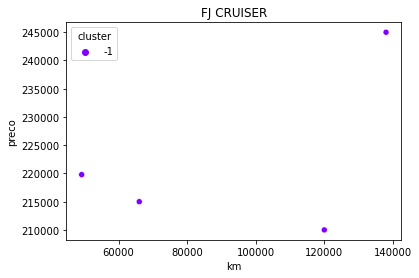


Há apenas um exemplar do modelo: LAND CRUISER
Portanto, não é possível estudá-lo estatisticamente.

MODELO: SIENNA


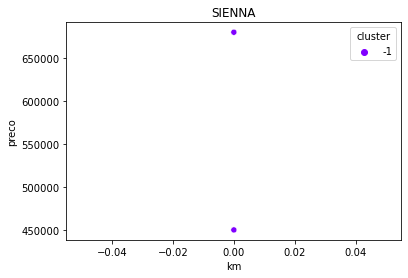


MODELO: PASEO


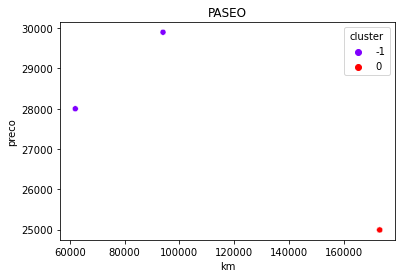


#############################################################
#############################################################
~~~~~~	Marca: HONDA
#############################################################
#############################################################


MODELO: FIT


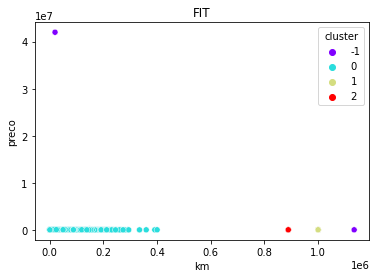


MODELO: CRV


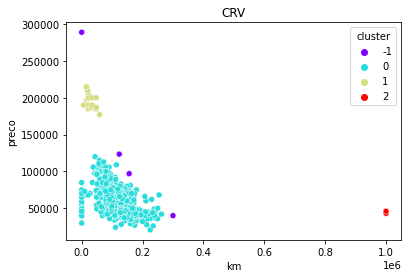


MODELO: CIVIC


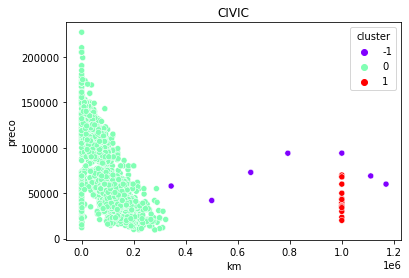


MODELO: ACCORD


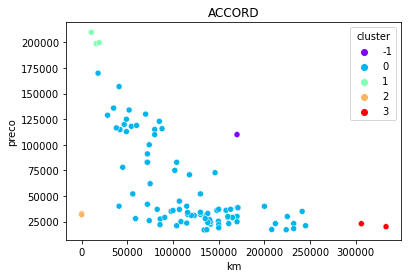


MODELO: HR-V


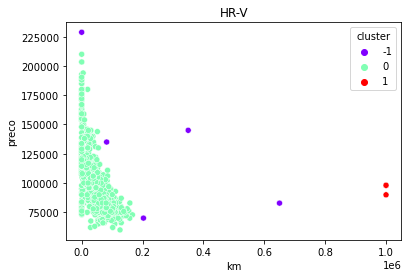


MODELO: CITY


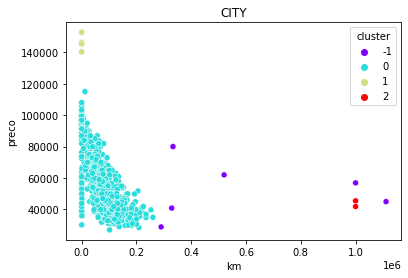


MODELO: WR-V


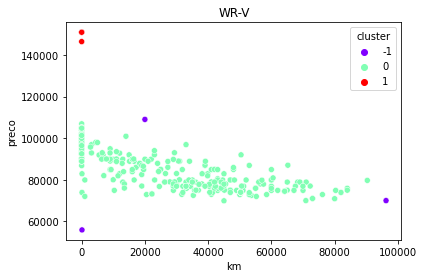


MODELO: LEGEND


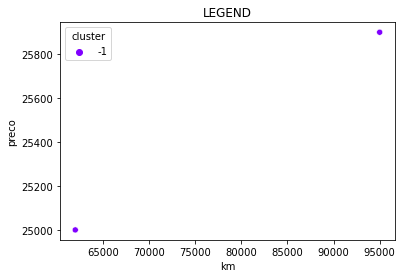


Há apenas um exemplar do modelo: PRELUDE
Portanto, não é possível estudá-lo estatisticamente.

#############################################################
#############################################################
~~~~~~	Marca: JEEP
#############################################################
#############################################################


MODELO: GRAND CHEROKEE


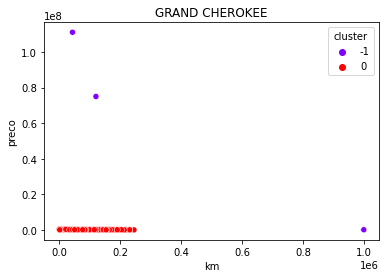


MODELO: RENEGADE


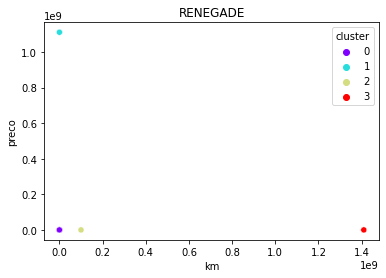


MODELO: COMPASS


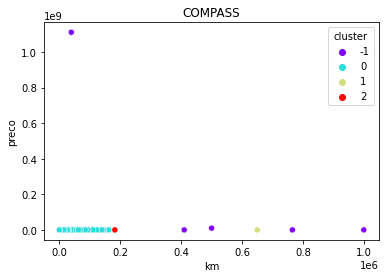


MODELO: CHEROKEE


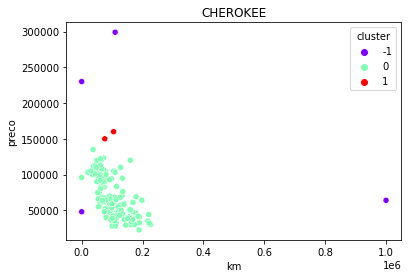


MODELO: WRANGLER


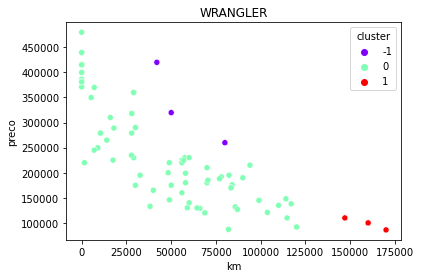


MODELO: CJ 5


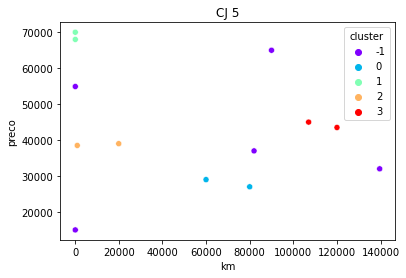


MODELO: CJ 6


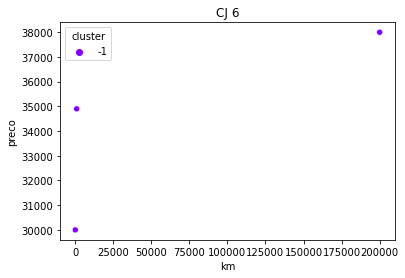


MODELO: COMMANDER


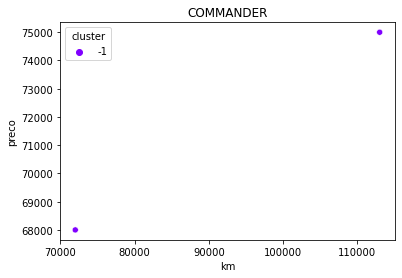


#############################################################
#############################################################
~~~~~~	Marca: PEUGEOT
#############################################################
#############################################################


MODELO: 207


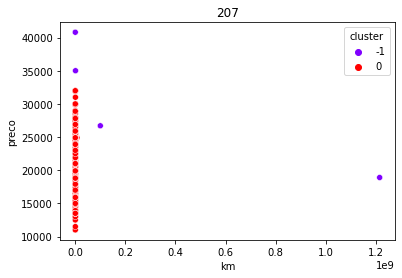


MODELO: 408


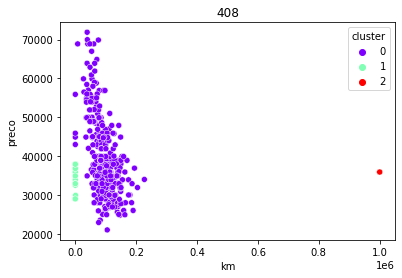


MODELO: 407


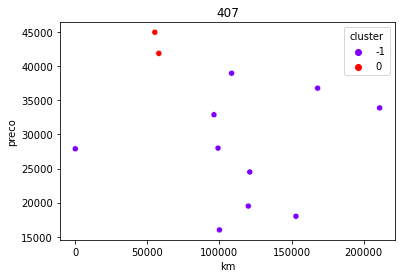


MODELO: 206


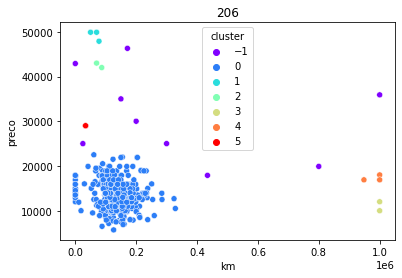


MODELO: 307


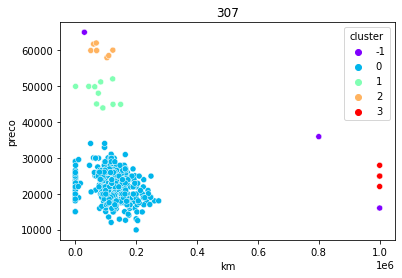


MODELO: 208


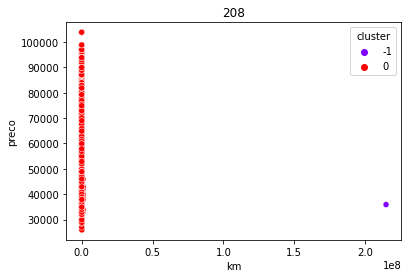


MODELO: 3008


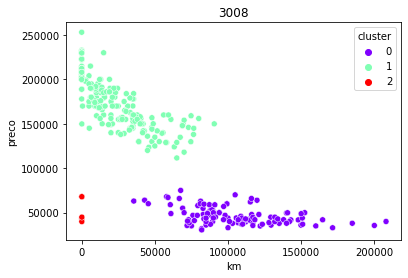


MODELO: 2008


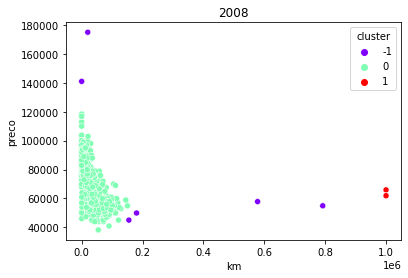


MODELO: RCZ


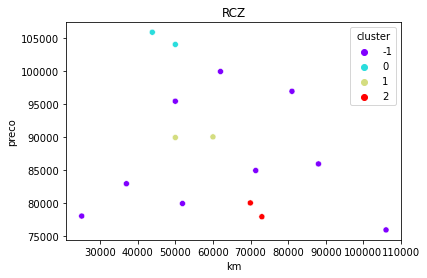


MODELO: 308


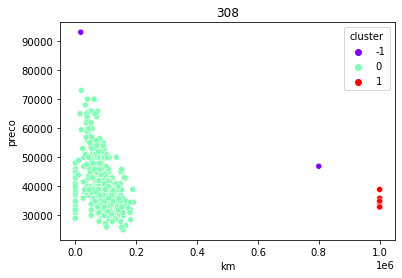


MODELO: BOXER


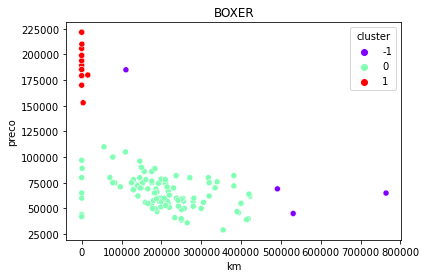


MODELO: 308cc


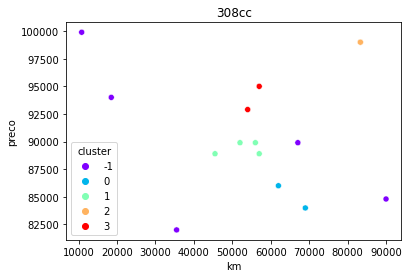


MODELO: 5008


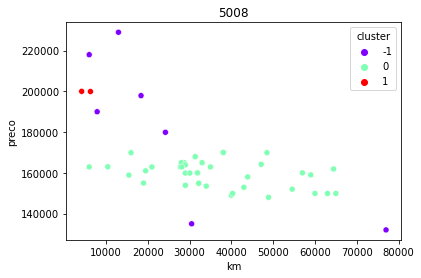


MODELO: 508


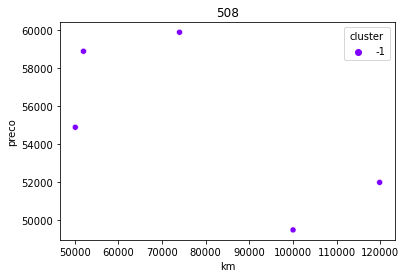


MODELO: EXPERT


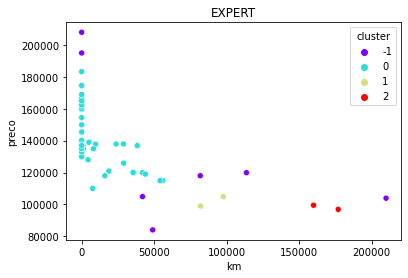


MODELO: PARTNER


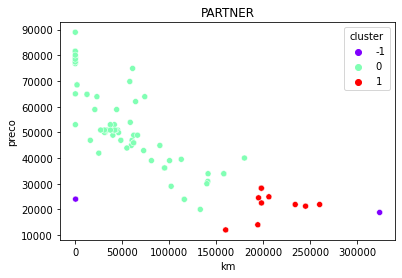


MODELO: 306


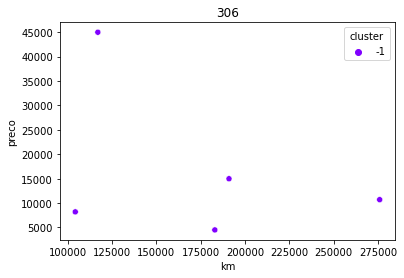


MODELO: 406


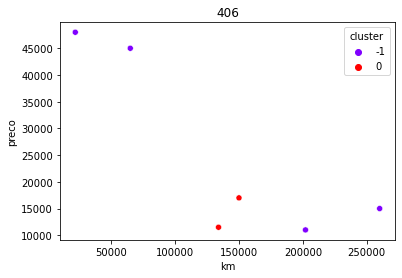


MODELO: HOGGAR


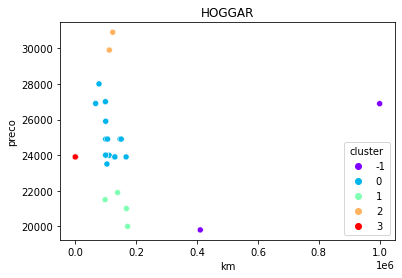


MODELO: 106


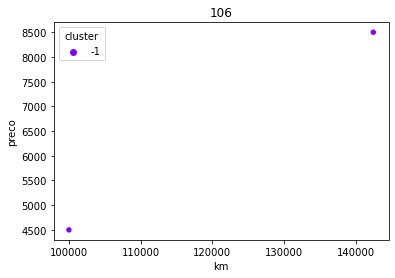

In [39]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

topN_dict = {}

for marca in topN:
    
    topN_dict[marca] = {}
    
    print("\n#############################################################")
    print("#############################################################")
    print("~~~~~~\tMarca:", marca)
    print("#############################################################")
    print("#############################################################\n")
    
    aux = df_marcas[marca]
    
    for modelo in aux["modelo"].unique():

        aux2 = aux[aux["modelo"] == modelo].copy()
        
        # apenas se tiver mais que um exemplar do modelo na base
        if aux2.shape[0] > 1:
            
            print("\nMODELO:", modelo)
            
            #################################################################################
#             # visualizando preço vs km com hue de ano
#             f = sns.scatterplot(data=aux2, y="preco", x="km", 
#                                 hue="ano", palette="rainbow")

#             ax = plt.gca()
#             ax.set_title(modelo)

#             plt.show()
            #################################################################################
            
            # clustering
            
            # selecionando features - apenas numeric & bool
            X = aux2.select_dtypes(include=[np.number, np.bool]).copy()
            
            # selecionando apenas algumas cols - sempre inclua preco!
            cols_features = ["preco", "km"]
            X = aux2[cols_features]
            
            # preenchendo NaNs
            cols_with_nan = X.isnull().any(axis=0)[X.isnull().any(axis=0) == True].index

            for col in cols_with_nan:

                # definindo os atributos pro cruzamento
                cols = ['transmissao', 'categoria', 'blindado', 'cilindrada', 'combustivel']

                # fazendo o agrupamento
                media_col = aux2.groupby(cols)[[col]].mean().reset_index()

                # sub-base com valores missing de "col", e apenas as colunas de cruzamento
                X_col_missing = aux2.loc[X[col].isnull()][cols]

                # fazendo o cruzamento
                valores_a_preencher = X_col_missing.merge(media_col, 
                                                          on=cols, 
                                                          how="left").set_index(X_col_missing.index)[col]

                # preenchendo vazio com as médias
                X.loc[df[col].isnull(), col] = valores_a_preencher
            
            # normalização
            X = pd.DataFrame(StandardScaler().fit_transform(X), columns = X.columns, index= X.index)
            
            #################################################################################
#             # visualizando a normalização
#             f = sns.scatterplot(data=X, y="preco", x="km", palette="rainbow")

#             ax = plt.gca()
#             ax.set_title(modelo)

#             plt.show()
            #################################################################################
    
            # modelagem
            db = DBSCAN(eps=0.5, min_samples=2, metric="euclidean").fit(X)
            
            # cluster labels
            aux2["cluster"] = db.labels_
            
            #################################################################################
            # visualizando preço vs km com hue de cluster
            f = sns.scatterplot(data=aux2, y="preco", x="km", 
                                hue="cluster", palette="rainbow")

            ax = plt.gca()
            ax.set_title(modelo)

            plt.show()
            #################################################################################
            
            # atualiza o dict com o aux2
            topN_dict[marca][modelo] = aux2

            
        else:
            
            print("\nHá apenas um exemplar do modelo:", modelo)
            print("Portanto, não é possível estudá-lo estatisticamente.")
            
        
#         display(aux2)
        
    
# del aux, aux2

In [40]:
topN_dict.keys()

dict_keys(['VOLKSWAGEN', 'CHEVROLET', 'FORD', 'FIAT', 'RENAULT', 'HYUNDAI', 'TOYOTA', 'HONDA', 'JEEP', 'PEUGEOT'])

In [41]:
topN_dict['HYUNDAI'].keys()

dict_keys(['EQUUS', 'VELOSTER', 'SANTA FÉ', 'AZERA', 'HB20S', 'TUCSON', 'CRETA', 'HR', 'HB20', 'IX35', 'ELANTRA', 'VERACRUZ', 'GENESIS', 'I30', 'HB20X', 'GRAND SANTA FÉ', 'SONATA', 'H100', 'I30 CW', 'GALLOPER', 'H1 STAREX', 'TERRACAN', 'COUPÊ'])


Outliers:


marca modelo   ano          km          preco
129818  HYUNDAI   HB20  2021           0  R$ 131.200,00
190353  HYUNDAI   HB20  2015     111.111   R$ 99.999,99
198068  HYUNDAI   HB20  2018  11.111.111   R$ 48.700,00
210332  HYUNDAI   HB20  2013   1.111.111   R$ 38.900,00
211422  HYUNDAI   HB20  2020     666.666   R$ 50.900,00
220884  HYUNDAI   HB20  2014     900.000   R$ 45.500,00
225020  HYUNDAI   HB20  2019     800.000   R$ 56.900,00
232692  HYUNDAI   HB20  2019      15.554  R$ 109.800,00

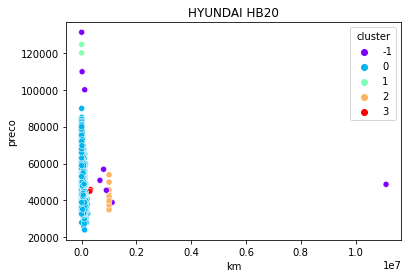

In [87]:
marca = 'HYUNDAI'
modelo = "HB20"

aux = topN_dict[marca][modelo]

aux2 = aux[aux["cluster"] == -1][["marca", "modelo", "ano", "km", "preco"]]

# aux2 = pd.DataFrame(StandardScaler().fit_transform(aux2), columns = aux2.columns, index= aux2index)

print("\nOutliers:")

aux2["km"] = aux2["km"].apply(lambda x: locale.format_string("%d", x, grouping=True))
aux2["preco"] = aux2["preco"].apply(lambda x: locale.currency(x, grouping=True))

display(aux2)

f = sns.scatterplot(data=aux, y="preco", x="km", 
                    hue="cluster", palette="rainbow")

ax = plt.gca()
ax.set_title(marca + " " + modelo)

plt.show()

__________

__________


____________

__API FIPE__

In [50]:
import requests 

resposta = requests.get("https://fipeapi.appspot.com/api/1/carros/veiculos/21.json")

In [51]:
resposta.json()

[{'fipe_marca': 'Fiat',
  'name': '147 C/ CL',
  'marca': 'FIAT',
  'key': '147-437',
  'id': '437',
  'fipe_name': '147 C/ CL'},
 {'fipe_marca': 'Fiat',
  'name': '147 Furgão (todos)',
  'marca': 'FIAT',
  'key': '147-438',
  'id': '438',
  'fipe_name': '147 Furgão (todos)'},
 {'fipe_marca': 'Fiat',
  'name': '147 Pick-Up (todas)',
  'marca': 'FIAT',
  'key': '147-439',
  'id': '439',
  'fipe_name': '147 Pick-Up (todas)'},
 {'fipe_marca': 'Fiat',
  'name': '500 ABARTH MULTIAIR 1.4 TB 16V 3p',
  'marca': 'FIAT',
  'key': '500-7097',
  'id': '7097',
  'fipe_name': '500 ABARTH MULTIAIR 1.4 TB 16V 3p'},
 {'fipe_marca': 'Fiat',
  'name': '500 Cabrio Dualogic Flex 1.4 8V',
  'marca': 'FIAT',
  'key': '500-6885',
  'id': '6885',
  'fipe_name': '500 Cabrio Dualogic Flex 1.4 8V'},
 {'fipe_marca': 'Fiat',
  'name': '500 Cabrio Flex 1.4 8V Mec.',
  'marca': 'FIAT',
  'key': '500-6886',
  'id': '6886',
  'fipe_name': '500 Cabrio Flex 1.4 8V Mec.'},
 {'fipe_marca': 'Fiat',
  'name': '500 Cabrio/50